## Importação dos dados

In [1]:
# Leitura de dados
import sys
import subprocess
import pkg_resources

if {'pandas'} not in {pkg.key for pkg in pkg_resources.working_set}:
    subprocess.check_call([sys.executable, '-m', 'pip', 'install','pandas'], stdout=subprocess.DEVNULL)

if {'numpy'} not in {pkg.key for pkg in pkg_resources.working_set}:
    subprocess.check_call([sys.executable, '-m', 'pip', 'install','numpy'], stdout=subprocess.DEVNULL)

if {'matplotlib'} not in {pkg.key for pkg in pkg_resources.working_set}:
    subprocess.check_call([sys.executable, '-m', 'pip', 'install','matplotlib'], stdout=subprocess.DEVNULL)

if {'seaborn'} not in {pkg.key for pkg in pkg_resources.working_set}:
    subprocess.check_call([sys.executable, '-m', 'pip', 'install','seaborn'], stdout=subprocess.DEVNULL)

if {'sklearn'} not in {pkg.key for pkg in pkg_resources.working_set}:
    subprocess.check_call([sys.executable, '-m', 'pip', 'install','sklearn'], stdout=subprocess.DEVNULL)

import matplotlib.pyplot as plt 
import os
import pickle
import pandas as pd
import numpy as np
import datetime
import seaborn as sns

In [2]:
base = pd.read_csv('../data/sih_aih_env_2011_2020_pneucom.csv',sep=',')

# https://raw.githubusercontent.com/lslbastos/ibge_population_projection/main/output/data_pop_ibge_proj_2010-2016.csv

### População de Referencia (por faixa etária e ano no RJ)

In [3]:
pop_ref = pd.read_csv('https://raw.githubusercontent.com/lslbastos/ibge_population_projection/main/output/data_pop_ibge_proj_2010-2016.csv',sep=',')

In [4]:
pop_ref.head()

,region,uf,age,sex,year,population
0,Brazil,BR,TOTAL,male,2010,95513298
1,Brazil,BR,TOTAL,male,2011,96322635
2,Brazil,BR,TOTAL,male,2012,97132054
3,Brazil,BR,TOTAL,male,2013,97931331
4,Brazil,BR,TOTAL,male,2014,98744098


In [5]:
pop_ref['sex'].unique()

array(['male', 'female', 'all'], dtype=object)

In [6]:
pop_ref = pop_ref[(pop_ref['age']!='TOTAL') & (pop_ref['uf']=='BR') & (pop_ref['sex']=='all') & (pop_ref['year'].isin(range(2011,2020)))]

In [7]:
pop_ref['age'] = pop_ref['age'].astype(int)

In [8]:
pop_ref.head()

,region,uf,age,sex,year,population
9436,Brazil,BR,0,all,2011,2912714
9437,Brazil,BR,0,all,2012,2921808
9438,Brazil,BR,0,all,2013,2912978
9439,Brazil,BR,0,all,2014,2951596
9440,Brazil,BR,0,all,2015,3011378


In [9]:
idadeWHO = base.groupby(['idade_grupo_who','idade_real_anos']).agg({'id':'count'}).reset_index()
idadeWHO.drop('id',axis=1,inplace=True)
idadeWHO

,idade_grupo_who,idade_real_anos
0,20-24,20
1,20-24,21
2,20-24,22
3,20-24,23
4,20-24,24
...,...,...
98,85+,118
99,85+,119
100,85+,120
101,85+,122


In [10]:
pop_ref = pd.merge(pop_ref,idadeWHO, how='left', left_on='age',right_on='idade_real_anos')

In [11]:
pop_ref

,region,uf,age,sex,year,population,idade_grupo_who,idade_real_anos
0,Brazil,BR,0,all,2011,2912714,NaN,NaN
1,Brazil,BR,0,all,2012,2921808,NaN,NaN
2,Brazil,BR,0,all,2013,2912978,NaN,NaN
3,Brazil,BR,0,all,2014,2951596,NaN,NaN
4,Brazil,BR,0,all,2015,3011378,NaN,NaN
...,...,...,...,...,...,...,...,...
814,Brazil,BR,90,all,2015,603580,85+,90.0
815,Brazil,BR,90,all,2016,645377,85+,90.0
816,Brazil,BR,90,all,2017,688657,85+,90.0
817,Brazil,BR,90,all,2018,731945,85+,90.0


In [12]:
pop_ref[pop_ref['year']==2011]

,region,uf,age,sex,year,population,idade_grupo_who,idade_real_anos
0,Brazil,BR,0,all,2011,2912714,NaN,NaN
9,Brazil,BR,1,all,2011,2899413,NaN,NaN
18,Brazil,BR,2,all,2011,2941136,NaN,NaN
27,Brazil,BR,3,all,2011,2960558,NaN,NaN
36,Brazil,BR,4,all,2011,2983612,NaN,NaN
...,...,...,...,...,...,...,...,...
774,Brazil,BR,86,all,2011,210601,85+,86.0
783,Brazil,BR,87,all,2011,180146,85+,87.0
792,Brazil,BR,88,all,2011,148707,85+,88.0
801,Brazil,BR,89,all,2011,115950,85+,89.0


In [13]:
pop_ref = pop_ref.groupby(['year','idade_grupo_who']).agg({'population':'sum'}).reset_index()
pop_ref

,year,idade_grupo_who,population
0,2011,20-24,17396868
1,2011,25-29,17423848
2,2011,30-34,16275019
3,2011,35-39,14350827
4,2011,40-44,13311309
...,...,...,...
121,2019,65-69,7081680
122,2019,70-74,5174388
123,2019,75-79,3480536
124,2019,80-84,2283815


### População de Referência (por sexo e ano no RJ)

In [14]:
pop_ref_by_sex = pd.read_csv('https://raw.githubusercontent.com/lslbastos/ibge_population_projection/main/output/data_pop_ibge_proj_2010-2016.csv',sep=',')

pop_ref_by_sex = pop_ref_by_sex[(pop_ref_by_sex['age']=='TOTAL') & (pop_ref_by_sex['uf']=='BR') & (pop_ref_by_sex['year'].isin(range(2011,2021)))]

### Base de Dados do CID-10

In [15]:
subprocess.check_call([sys.executable, '-m', 'pip', 'install','openpyxl'], stdout=subprocess.DEVNULL)

0

In [16]:
#cid10 = pd.read_csv('cids_diag_ahrq_css_br - Copy.csv',sep=',') 

cid10 = pd.read_excel ('../data/cids_diag_ahrq_css_br_v5.xlsx')

In [17]:
cid10

,icd10_br,icd10_us,cid_10_gen_categ,cid_10_det_categ,ccs_lvl_2_label,class_abritrario,icd10_us_desc,icd10_br_desc
0,A15,A159,INFECTIOUS & PARASITIC DIS,Tuberculosis,Bacterial infection,Infeccions,Respiratory tuberculosis unspecified,Tuberc respirat c/conf bacteriol e histolog
1,A150,A150,INFECTIOUS & PARASITIC DIS,Tuberculosis,Bacterial infection,Infeccions,Tuberculosis of lung,Tuberc pulm c/conf p/ex micr expec c/s/cult
2,A151,A150,INFECTIOUS & PARASITIC DIS,Tuberculosis,Bacterial infection,Infeccions,Tuberculosis of lung,Tuberc pulmonar c/conf somente p/cultura
3,A152,A150,INFECTIOUS & PARASITIC DIS,Tuberculosis,Bacterial infection,Infeccions,Tuberculosis of lung,Tuberc pulmonar c/conf histolog
4,A153,A150,INFECTIOUS & PARASITIC DIS,Tuberculosis,Bacterial infection,Infeccions,Tuberculosis of lung,Tuberc pulmonar c/conf p/meio NE
...,...,...,...,...,...,...,...,...
14266,F99,F99,MENTAL DISORDERS,Miscellaneous mental health disorders,Miscellaneous mental disorders [670],Mental disorders,"Mental disorder, not otherwise specified",Transt mental NE em outr parte
14267,R45,R4589,MENTAL DISORDERS,Miscellaneous mental health disorders,Miscellaneous mental disorders [670],Mental disorders,Other symptoms and signs involving emotional s...,Sint e sinais relativos ao estado emocional
14268,R458,R4589,MENTAL DISORDERS,Miscellaneous mental health disorders,Miscellaneous mental disorders [670],Mental disorders,Other symptoms and signs involving emotional s...,Outr sint sinais relativos estado emocional
14269,R630,R630,MENTAL DISORDERS,Miscellaneous mental health disorders,Other nutritional/ endocrine/ and metabolic di...,Cronic-Deg,Anorexia,Anorexia


In [18]:
#cid10 = cid10[['icd10_br','cid_10_gen_categ','cid_10_det_categ','ccs_lvl_2_label','class_abritrario']]

### Base de Dados do CNES

In [19]:
cnes = pd.read_csv('../data/cnes_estabelecimentos.csv',sep=';',encoding='unicode_escape')
#cnes = pd.read_csv('estabelecimentos-330000.csv',sep=';')

In [20]:
cnes.shape

(380823, 36)

In [21]:
cnes.head()

,CO_CNES,CO_UNIDADE,CO_UF,CO_IBGE,NU_CNPJ_MANTENEDORA,NO_RAZAO_SOCIAL,NO_FANTASIA,CO_NATUREZA_ORGANIZACAO,DS_NATUREZA_ORGANIZACAO,TP_GESTAO,...,NO_EMAIL,CO_NATUREZA_JUR,ST_CENTRO_CIRURGICO,ST_CENTRO_OBSTETRICO,ST_CENTRO_NEONATAL,ST_ATEND_HOSPITALAR,ST_SERVICO_APOIO,ST_ATEND_AMBULATORIAL,CO_MOTIVO_DESAB,CO_AMBULATORIAL_SUS
0,19,2602900000019,26,260290,1.129440e+13,PREFEITURA MUNICIPAL DO CABO DE SANTO AGOSTINHO,POLICLINICA DR JAMACI DE MEDEIROS,NaN,NaN,M,...,NaN,1244,0.0,0.0,0.0,0.0,1.0,0.0,NaN,SIM
1,27,2602900000027,26,260290,1.093045e+13,CASA DE SAUDE E MATERNIDADE SANTA HELENA LTDA,CASA DE SAUDE SANTA HELENA,NaN,NaN,M,...,NaN,2062,1.0,1.0,1.0,1.0,1.0,1.0,NaN,SIM
2,35,2602900000035,26,260290,1.129440e+13,PREFEITURA MUNICIPAL DO CABO DE SANTO AGOSTINHO,HOSPITAL MENDO SAMPAIO,NaN,NaN,M,...,NaN,1244,1.0,1.0,1.0,1.0,1.0,1.0,NaN,SIM
3,43,2602900000043,26,260290,1.129440e+13,PREFEITURA MUNICIPAL DO CABO DE SANTO AGOSTINHO,POLICLINICA DR MANUEL GOMES,NaN,NaN,M,...,NaN,1244,0.0,0.0,0.0,0.0,1.0,0.0,NaN,SIM
4,51,2602900000051,26,260290,1.129440e+13,PREFEITURA MUNICIPAL DO CABO DE SANTO AGOSTINHO,POLICLINICA VICENTE MENDES,NaN,NaN,M,...,NaN,1244,0.0,0.0,0.0,0.0,1.0,0.0,NaN,SIM


In [22]:
cnes_prof = pd.read_csv('../data/profissionais-330000.csv',sep=';')

In [23]:
cnes_prof.head()

,NOME,CNS,SEXO,IBGE,UF,MUNICIPIO,CBO,DESCRICAO CBO,CNES,CNPJ,...,GESTAO,SUS,RESIDENTE,PRECEPTOR,VINCULO ESTABELECIMENTO,VINCULO EMPREGADOR,DETALHAMENTO DO VINCULO,CH OUTROS,CH AMB.,CH HOSP.
0,CLAUDIA WEBER DA SILVA MARTINS,2.015509e+14,NaN,330330,RJ,NITEROI,223905,TERAPEUTA OCUPACIONAL,2273004,3.010050e+13,...,M,S,N,N,VINCULO EMPREGATICIO,CELETISTA,NAO SE APLICA,0,32,0
1,WANDERLEY DE CASTRO VIVAS,7.002095e+14,NaN,330330,RJ,NITEROI,223605,FISIOTERAPEUTA GERAL,3065634,6.088486e+13,...,M,N,N,N,VINCULO EMPREGATICIO,CELETISTA,NAO SE APLICA,0,0,30
2,WANDERLEY DE CASTRO VIVAS,7.002095e+14,NaN,330170,RJ,DUQUE DE CAXIAS,223605,FISIOTERAPEUTA GERAL,6007317,NaN,...,M,S,N,N,INTERMEDIADO,COOPERADO,NAO SE APLICA,0,24,0
3,IARA TANIA GONCALVES,1.702906e+14,NaN,330330,RJ,NITEROI,225151,MEDICO ANESTESIOLOGISTA,12505,2.852322e+13,...,M,S,N,N,VINCULO EMPREGATICIO,ESTATUTARIO,SERVIDOR PROPRIO,0,20,20
4,IARA TANIA GONCALVES,1.702906e+14,NaN,330490,RJ,SAO GONCALO,225151,MEDICO ANESTESIOLOGISTA,3196909,3.253430e+13,...,M,N,N,N,VINCULO EMPREGATICIO,CONTRATO POR PRAZO DETERMINADO,PRIVADO,0,2,0


In [24]:
cnes_pf = cnes_prof.groupby('CNES').agg({'NOME':'count'}).reset_index()
cnes_pf.columns = ['cnes','qnt_prof']

In [25]:
cnes = pd.merge(cnes,cnes_pf,how='left',left_on='CO_CNES',right_on='cnes')

In [26]:
cnes.head()

,CO_CNES,CO_UNIDADE,CO_UF,CO_IBGE,NU_CNPJ_MANTENEDORA,NO_RAZAO_SOCIAL,NO_FANTASIA,CO_NATUREZA_ORGANIZACAO,DS_NATUREZA_ORGANIZACAO,TP_GESTAO,...,ST_CENTRO_CIRURGICO,ST_CENTRO_OBSTETRICO,ST_CENTRO_NEONATAL,ST_ATEND_HOSPITALAR,ST_SERVICO_APOIO,ST_ATEND_AMBULATORIAL,CO_MOTIVO_DESAB,CO_AMBULATORIAL_SUS,cnes,qnt_prof
0,19,2602900000019,26,260290,1.129440e+13,PREFEITURA MUNICIPAL DO CABO DE SANTO AGOSTINHO,POLICLINICA DR JAMACI DE MEDEIROS,NaN,NaN,M,...,0.0,0.0,0.0,0.0,1.0,0.0,NaN,SIM,NaN,NaN
1,27,2602900000027,26,260290,1.093045e+13,CASA DE SAUDE E MATERNIDADE SANTA HELENA LTDA,CASA DE SAUDE SANTA HELENA,NaN,NaN,M,...,1.0,1.0,1.0,1.0,1.0,1.0,NaN,SIM,NaN,NaN
2,35,2602900000035,26,260290,1.129440e+13,PREFEITURA MUNICIPAL DO CABO DE SANTO AGOSTINHO,HOSPITAL MENDO SAMPAIO,NaN,NaN,M,...,1.0,1.0,1.0,1.0,1.0,1.0,NaN,SIM,NaN,NaN
3,43,2602900000043,26,260290,1.129440e+13,PREFEITURA MUNICIPAL DO CABO DE SANTO AGOSTINHO,POLICLINICA DR MANUEL GOMES,NaN,NaN,M,...,0.0,0.0,0.0,0.0,1.0,0.0,NaN,SIM,NaN,NaN
4,51,2602900000051,26,260290,1.129440e+13,PREFEITURA MUNICIPAL DO CABO DE SANTO AGOSTINHO,POLICLINICA VICENTE MENDES,NaN,NaN,M,...,0.0,0.0,0.0,0.0,1.0,0.0,NaN,SIM,NaN,NaN


## Filtrando a Base

In [27]:
base.head()

,id,estado,regiao,munic_res,sexo,raca_cor,idade_real_anos,los_hosp,los_uti,uti,morte,cnes,diag_princ_trim_upper,proc_rea,ano_inter,date_inter,date_saida,idade_grupo_who
0,96789447,SC,S,421570,3,1,87,15,0,0,0,2418177,J181,303140151,2011,2011-06-15,2011-06-30,85+
1,96791595,SC,S,420240,1,1,84,4,0,0,1,2558246,J189,303140151,2011,2011-06-11,2011-06-15,80-84
2,96789449,SC,S,421570,3,1,92,5,0,0,0,2418177,J180,303140151,2011,2011-07-09,2011-07-14,85+
3,96791075,SC,S,420200,1,1,25,4,0,0,0,2772752,J180,303140151,2011,2011-05-22,2011-05-26,25-29
4,96789560,SC,S,420650,3,1,67,9,0,0,0,2492342,J189,303140151,2011,2011-05-27,2011-06-05,65-69


In [28]:
base = base[base['ano_inter'].isin(range(2011,2020))]

In [29]:
base = pd.merge(base,cid10,how='left',left_on='diag_princ_trim_upper',right_on='icd10_br')

In [30]:
base.head()

,id,estado,regiao,munic_res,sexo,raca_cor,idade_real_anos,los_hosp,los_uti,uti,...,date_saida,idade_grupo_who,icd10_br,icd10_us,cid_10_gen_categ,cid_10_det_categ,ccs_lvl_2_label,class_abritrario,icd10_us_desc,icd10_br_desc
0,96789447,SC,S,421570,3,1,87,15,0,0,...,2011-06-30,85+,J181,J181,RESPIRATORY SYSTEM,Pneumonia (except that caused by tuberculosis ...,Respiratory infections,Infeccions,"Lobar pneumonia, unspecified organism",Pneumonia lobar NE
1,96791595,SC,S,420240,1,1,84,4,0,0,...,2011-06-15,80-84,J189,J189,RESPIRATORY SYSTEM,Pneumonia (except that caused by tuberculosis ...,Respiratory infections,Infeccions,"Pneumonia, unspecified organism",Pneumonia NE
2,96789449,SC,S,421570,3,1,92,5,0,0,...,2011-07-14,85+,J180,J180,RESPIRATORY SYSTEM,Pneumonia (except that caused by tuberculosis ...,Respiratory infections,Infeccions,"Bronchopneumonia, unspecified organism",Broncopneumonia NE
3,96791075,SC,S,420200,1,1,25,4,0,0,...,2011-05-26,25-29,J180,J180,RESPIRATORY SYSTEM,Pneumonia (except that caused by tuberculosis ...,Respiratory infections,Infeccions,"Bronchopneumonia, unspecified organism",Broncopneumonia NE
4,96789560,SC,S,420650,3,1,67,9,0,0,...,2011-06-05,65-69,J189,J189,RESPIRATORY SYSTEM,Pneumonia (except that caused by tuberculosis ...,Respiratory infections,Infeccions,"Pneumonia, unspecified organism",Pneumonia NE


In [31]:
base = pd.merge(base,cnes,how='left',left_on='cnes',right_on='CO_CNES')

In [32]:
base.head()

,id,estado,regiao,munic_res,sexo,raca_cor,idade_real_anos,los_hosp,los_uti,uti,...,ST_CENTRO_CIRURGICO,ST_CENTRO_OBSTETRICO,ST_CENTRO_NEONATAL,ST_ATEND_HOSPITALAR,ST_SERVICO_APOIO,ST_ATEND_AMBULATORIAL,CO_MOTIVO_DESAB,CO_AMBULATORIAL_SUS,cnes_y,qnt_prof
0,96789447,SC,S,421570,3,1,87,15,0,0,...,1.0,0.0,0.0,1.0,1.0,1.0,NaN,SIM,NaN,NaN
1,96791595,SC,S,420240,1,1,84,4,0,0,...,1.0,1.0,1.0,1.0,1.0,1.0,NaN,SIM,NaN,NaN
2,96789449,SC,S,421570,3,1,92,5,0,0,...,1.0,0.0,0.0,1.0,1.0,1.0,NaN,SIM,NaN,NaN
3,96791075,SC,S,420200,1,1,25,4,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,96789560,SC,S,420650,3,1,67,9,0,0,...,1.0,0.0,0.0,1.0,1.0,1.0,NaN,SIM,NaN,NaN


In [33]:
#base['remover'] = base['diag_princ_trim_upper'].apply(lambda x: 1 if x.startswith('F') else (2 if x.startswith('O') else (3 if x.startswith('P') else (4 if x.startswith('Q') else 0 ) ) ) )
# F # ICD-10 CHAPTER V - Mental and behavioral disorders
# O # ICD-10 CHAPTER XV - Pregnancy, childbirth and the puerperium
# P # ICD-10 CHAPTER XVI - Certain conditions originating in the perinatal period
# Q # ICD-10 CHAPTER XVII - Congenital malformations, deformations and chromosomal abnormalities

#base = base[base['class_abritrario'].isin(['Infeccions', 'Cronic-Deg', 'Injuries', 'Neoplasms'])]

#base['remover'] = base['diag_princ_trim_upper'].apply(lambda x: 0 if x.startswith('J10') else (0 if x.startswith('J12') else (0 if x.startswith('J13') else (0 if x.startswith('J14') else (0 if x.startswith('J15') else (0 if x.startswith('J16') else (0 if x.startswith('J17') else (0 if x.startswith('J18') else 1 ) ) ) ) ) ) ) )

In [34]:
#base[base['remover'] == 0]['diag_princ_trim_upper'].head()

In [35]:
#base = base[base['remover'] == 0]

In [36]:
base['classificacao'] = base['idade_grupo_who'].apply(lambda x: 1 if x in ['60-64','65-69','70-74','75-79','80-84','85+'] else 0)

#y = ['60-64']
#y.isin(['60-64','65-69','70-74','75-79','80-84','85+'])

In [37]:
base.shape

(3144575, 65)

In [38]:
base['CO_NATUREZA_JUR'].unique()

array([3999.,   nan, 3069., 1120., 1023., 1244., 1031., 1279., 1155.,
       2011., 2062., 1104., 1112., 1147., 1015., 2240., 3131., 2054.,
       2305., 1139., 3077., 2046., 1260., 2135., 2089., 3301., 4000.,
       1236., 1210., 2313., 1180., 2143.])

In [39]:
base['nat_jur'] = base['CO_NATUREZA_JUR'].apply(lambda x: 'Administração Pública' if x in range(1000,2000) else ('Entidades Empresariais' if x in range(2000,3000) else ('Entidades Empresariais' if x in range(3000,4000) else ('Pessoas Físicas' if x in range(4000,5000) else 'Organizações Internacionais e Outras Instituições Extraterritoriais'))))


In [40]:
base[['CO_NATUREZA_JUR','nat_jur']].head()

,CO_NATUREZA_JUR,nat_jur
0,3999.0,Entidades Empresariais
1,3999.0,Entidades Empresariais
2,3999.0,Entidades Empresariais
3,NaN,Organizações Internacionais e Outras Instituiç...
4,3999.0,Entidades Empresariais


In [41]:
base['nat_jur'].unique()

array(['Entidades Empresariais',
       'Organizações Internacionais e Outras Instituições Extraterritoriais',
       'Administração Pública', 'Pessoas Físicas'], dtype=object)

In [42]:
# Qnt de idosos
base[base['idade_real_anos'] >= 60]['id'].count()

2028053

In [43]:
# Qnt de não idosos
base[base['idade_real_anos'] < 60]['id'].count()

1116522

In [44]:
base.columns

Index(['id', 'estado', 'regiao', 'munic_res', 'sexo', 'raca_cor',
       'idade_real_anos', 'los_hosp', 'los_uti', 'uti', 'morte', 'cnes_x',
       'diag_princ_trim_upper', 'proc_rea', 'ano_inter', 'date_inter',
       'date_saida', 'idade_grupo_who', 'icd10_br', 'icd10_us',
       'cid_10_gen_categ', 'cid_10_det_categ', 'ccs_lvl_2_label',
       'class_abritrario', 'icd10_us_desc', 'icd10_br_desc', 'CO_CNES',
       'CO_UNIDADE', 'CO_UF', 'CO_IBGE', 'NU_CNPJ_MANTENEDORA',
       'NO_RAZAO_SOCIAL', 'NO_FANTASIA', 'CO_NATUREZA_ORGANIZACAO',
       'DS_NATUREZA_ORGANIZACAO', 'TP_GESTAO', 'CO_NIVEL_HIERARQUIA',
       'DS_NIVEL_HIERARQUIA', 'CO_ESFERA_ADMINISTRATIVA',
       'DS_ESFERA_ADMINISTRATIVA', 'CO_ATIVIDADE', 'TP_UNIDADE', 'CO_CEP',
       'NO_LOGRADOURO', 'NU_ENDERECO', 'NO_BAIRRO', 'NU_TELEFONE',
       'NU_LATITUDE', 'NU_LONGITUDE', 'CO_TURNO_ATENDIMENTO',
       'DS_TURNO_ATENDIMENTO', 'NU_CNPJ', 'NO_EMAIL', 'CO_NATUREZA_JUR',
       'ST_CENTRO_CIRURGICO', 'ST_CENTRO_OBSTETRI

In [45]:
pd.set_option('display.max_columns', None)
base.head()

,id,estado,regiao,munic_res,sexo,raca_cor,idade_real_anos,los_hosp,los_uti,uti,morte,cnes_x,diag_princ_trim_upper,proc_rea,ano_inter,date_inter,date_saida,idade_grupo_who,icd10_br,icd10_us,cid_10_gen_categ,cid_10_det_categ,ccs_lvl_2_label,class_abritrario,icd10_us_desc,icd10_br_desc,CO_CNES,CO_UNIDADE,CO_UF,CO_IBGE,NU_CNPJ_MANTENEDORA,NO_RAZAO_SOCIAL,NO_FANTASIA,CO_NATUREZA_ORGANIZACAO,DS_NATUREZA_ORGANIZACAO,TP_GESTAO,CO_NIVEL_HIERARQUIA,DS_NIVEL_HIERARQUIA,CO_ESFERA_ADMINISTRATIVA,DS_ESFERA_ADMINISTRATIVA,CO_ATIVIDADE,TP_UNIDADE,CO_CEP,NO_LOGRADOURO,NU_ENDERECO,NO_BAIRRO,NU_TELEFONE,NU_LATITUDE,NU_LONGITUDE,CO_TURNO_ATENDIMENTO,DS_TURNO_ATENDIMENTO,NU_CNPJ,NO_EMAIL,CO_NATUREZA_JUR,ST_CENTRO_CIRURGICO,ST_CENTRO_OBSTETRICO,ST_CENTRO_NEONATAL,ST_ATEND_HOSPITALAR,ST_SERVICO_APOIO,ST_ATEND_AMBULATORIAL,CO_MOTIVO_DESAB,CO_AMBULATORIAL_SUS,cnes_y,qnt_prof,classificacao,nat_jur
0,96789447,SC,S,421570,3,1,87,15,0,0,0,2418177,J181,303140151,2011,2011-06-15,2011-06-30,85+,J181,J181,RESPIRATORY SYSTEM,Pneumonia (except that caused by tuberculosis ...,Respiratory infections,Infeccions,"Lobar pneumonia, unspecified organism",Pneumonia lobar NE,2418177.0,4.215702e+12,42.0,421570.0,NaN,SOCIEDADE HOSPITALAR SAO FRANCISCO DE ASSIS,HOSPITAL SAO FRANCISCO,NaN,NaN,M,NaN,NaN,NaN,NaN,4.0,5.0,88140000.0,ESCRIVAO ALFREDO PORTO,99,CENTRO,48 32451783,-27.689323,-48.779426,6.0,ATENDIMENTO CONTINUO DE 24 HORAS/DIA (PLANTAO:...,8.602590e+13,NaN,3999.0,1.0,0.0,0.0,1.0,1.0,1.0,NaN,SIM,NaN,NaN,1,Entidades Empresariais
1,96791595,SC,S,420240,1,1,84,4,0,0,1,2558246,J189,303140151,2011,2011-06-11,2011-06-15,80-84,J189,J189,RESPIRATORY SYSTEM,Pneumonia (except that caused by tuberculosis ...,Respiratory infections,Infeccions,"Pneumonia, unspecified organism",Pneumonia NE,2558246.0,4.202403e+12,42.0,420240.0,NaN,ASSOCIACAO CONGREGACAO DESANTA CATARINA,HOSPITAL SANTA ISABEL,NaN,NaN,M,NaN,NaN,NaN,NaN,3.0,5.0,89010506.0,RUA FLORIANO PEIXOTO,300,CENTRO,(47) 3321-1000,-26.923751,-49.065819,6.0,ATENDIMENTO CONTINUO DE 24 HORAS/DIA (PLANTAO:...,6.092217e+13,dirgeral@santaisabel.com.br,3999.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,SIM,NaN,NaN,1,Entidades Empresariais
2,96789449,SC,S,421570,3,1,92,5,0,0,0,2418177,J180,303140151,2011,2011-07-09,2011-07-14,85+,J180,J180,RESPIRATORY SYSTEM,Pneumonia (except that caused by tuberculosis ...,Respiratory infections,Infeccions,"Bronchopneumonia, unspecified organism",Broncopneumonia NE,2418177.0,4.215702e+12,42.0,421570.0,NaN,SOCIEDADE HOSPITALAR SAO FRANCISCO DE ASSIS,HOSPITAL SAO FRANCISCO,NaN,NaN,M,NaN,NaN,NaN,NaN,4.0,5.0,88140000.0,ESCRIVAO ALFREDO PORTO,99,CENTRO,48 32451783,-27.689323,-48.779426,6.0,ATENDIMENTO CONTINUO DE 24 HORAS/DIA (PLANTAO:...,8.602590e+13,NaN,3999.0,1.0,0.0,0.0,1.0,1.0,1.0,NaN,SIM,NaN,NaN,1,Entidades Empresariais
3,96791075,SC,S,420200,1,1,25,4,0,0,0,2772752,J180,303140151,2011,2011-05-22,2011-05-26,25-29,J180,J180,RESPIRATORY SYSTEM,Pneumonia (except that caused by tuberculosis ...,Respiratory infections,Infeccions,"Bronchopneumonia, unspecified organism",Broncopneumonia NE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Organizações Internacionais e Outras Instituiç...
4,96789560,SC,S,420650,3,1,67,9,0,0,0,2492342,J189,303140151,2011,2011-05-27,2011-06-05,65-69,J189,J189,RESPIRATORY SYSTEM,Pneumonia (except that caused by tuberculosis ...,Respiratory infections,Infeccions,"Pneumonia, unspecified organism",Pneumonia NE,2492342.0,4.206502e+12,42.0,420650.0,NaN,INSTITUTO SANTE,HOSPITAL SANTO ANTONIO GUARAMIRIM,NaN,NaN,M,NaN,NaN,NaN,NaN,4.0,5.0,89270000.0,JOAO BUTSCHARDT,05,CENTRO,47 33769400,-26.478699,-49.001014,6.0,ATENDIMENTO CONTINUO DE 24 HORAS/DIA (PLANTAO:...,8.776971e+12,direcao@hsagmm.com.br,3999.0,1.0,0.0,0.0,1.0,1.0,1.0,NaN,SIM,NaN,NaN,1,Entidades Empresariais


In [46]:
#base.drop(['CO_CNES','CO_UNIDADE','CO_UF','CO_IBGE','NU_CNPJ_MANTENEDORA','NO_RAZAO_SOCIAL','NO_FANTASIA','CO_NATUREZA_ORGANIZACAO','DS_NATUREZA_ORGANIZACAO','DS_NATUREZA_ORGANIZACAO','CO_NIVEL_HIERARQUIA','',''])

In [47]:
base_eld = base[base['classificacao'] == 1]
base_eld.head()

,id,estado,regiao,munic_res,sexo,raca_cor,idade_real_anos,los_hosp,los_uti,uti,morte,cnes_x,diag_princ_trim_upper,proc_rea,ano_inter,date_inter,date_saida,idade_grupo_who,icd10_br,icd10_us,cid_10_gen_categ,cid_10_det_categ,ccs_lvl_2_label,class_abritrario,icd10_us_desc,icd10_br_desc,CO_CNES,CO_UNIDADE,CO_UF,CO_IBGE,NU_CNPJ_MANTENEDORA,NO_RAZAO_SOCIAL,NO_FANTASIA,CO_NATUREZA_ORGANIZACAO,DS_NATUREZA_ORGANIZACAO,TP_GESTAO,CO_NIVEL_HIERARQUIA,DS_NIVEL_HIERARQUIA,CO_ESFERA_ADMINISTRATIVA,DS_ESFERA_ADMINISTRATIVA,CO_ATIVIDADE,TP_UNIDADE,CO_CEP,NO_LOGRADOURO,NU_ENDERECO,NO_BAIRRO,NU_TELEFONE,NU_LATITUDE,NU_LONGITUDE,CO_TURNO_ATENDIMENTO,DS_TURNO_ATENDIMENTO,NU_CNPJ,NO_EMAIL,CO_NATUREZA_JUR,ST_CENTRO_CIRURGICO,ST_CENTRO_OBSTETRICO,ST_CENTRO_NEONATAL,ST_ATEND_HOSPITALAR,ST_SERVICO_APOIO,ST_ATEND_AMBULATORIAL,CO_MOTIVO_DESAB,CO_AMBULATORIAL_SUS,cnes_y,qnt_prof,classificacao,nat_jur
0,96789447,SC,S,421570,3,1,87,15,0,0,0,2418177,J181,303140151,2011,2011-06-15,2011-06-30,85+,J181,J181,RESPIRATORY SYSTEM,Pneumonia (except that caused by tuberculosis ...,Respiratory infections,Infeccions,"Lobar pneumonia, unspecified organism",Pneumonia lobar NE,2418177.0,4.215702e+12,42.0,421570.0,NaN,SOCIEDADE HOSPITALAR SAO FRANCISCO DE ASSIS,HOSPITAL SAO FRANCISCO,NaN,NaN,M,NaN,NaN,NaN,NaN,4.0,5.0,88140000.0,ESCRIVAO ALFREDO PORTO,99,CENTRO,48 32451783,-27.689323,-48.779426,6.0,ATENDIMENTO CONTINUO DE 24 HORAS/DIA (PLANTAO:...,8.602590e+13,NaN,3999.0,1.0,0.0,0.0,1.0,1.0,1.0,NaN,SIM,NaN,NaN,1,Entidades Empresariais
1,96791595,SC,S,420240,1,1,84,4,0,0,1,2558246,J189,303140151,2011,2011-06-11,2011-06-15,80-84,J189,J189,RESPIRATORY SYSTEM,Pneumonia (except that caused by tuberculosis ...,Respiratory infections,Infeccions,"Pneumonia, unspecified organism",Pneumonia NE,2558246.0,4.202403e+12,42.0,420240.0,NaN,ASSOCIACAO CONGREGACAO DESANTA CATARINA,HOSPITAL SANTA ISABEL,NaN,NaN,M,NaN,NaN,NaN,NaN,3.0,5.0,89010506.0,RUA FLORIANO PEIXOTO,300,CENTRO,(47) 3321-1000,-26.923751,-49.065819,6.0,ATENDIMENTO CONTINUO DE 24 HORAS/DIA (PLANTAO:...,6.092217e+13,dirgeral@santaisabel.com.br,3999.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,SIM,NaN,NaN,1,Entidades Empresariais
2,96789449,SC,S,421570,3,1,92,5,0,0,0,2418177,J180,303140151,2011,2011-07-09,2011-07-14,85+,J180,J180,RESPIRATORY SYSTEM,Pneumonia (except that caused by tuberculosis ...,Respiratory infections,Infeccions,"Bronchopneumonia, unspecified organism",Broncopneumonia NE,2418177.0,4.215702e+12,42.0,421570.0,NaN,SOCIEDADE HOSPITALAR SAO FRANCISCO DE ASSIS,HOSPITAL SAO FRANCISCO,NaN,NaN,M,NaN,NaN,NaN,NaN,4.0,5.0,88140000.0,ESCRIVAO ALFREDO PORTO,99,CENTRO,48 32451783,-27.689323,-48.779426,6.0,ATENDIMENTO CONTINUO DE 24 HORAS/DIA (PLANTAO:...,8.602590e+13,NaN,3999.0,1.0,0.0,0.0,1.0,1.0,1.0,NaN,SIM,NaN,NaN,1,Entidades Empresariais
4,96789560,SC,S,420650,3,1,67,9,0,0,0,2492342,J189,303140151,2011,2011-05-27,2011-06-05,65-69,J189,J189,RESPIRATORY SYSTEM,Pneumonia (except that caused by tuberculosis ...,Respiratory infections,Infeccions,"Pneumonia, unspecified organism",Pneumonia NE,2492342.0,4.206502e+12,42.0,420650.0,NaN,INSTITUTO SANTE,HOSPITAL SANTO ANTONIO GUARAMIRIM,NaN,NaN,M,NaN,NaN,NaN,NaN,4.0,5.0,89270000.0,JOAO BUTSCHARDT,05,CENTRO,47 33769400,-26.478699,-49.001014,6.0,ATENDIMENTO CONTINUO DE 24 HORAS/DIA (PLANTAO:...,8.776971e+12,direcao@hsagmm.com.br,3999.0,1.0,0.0,0.0,1.0,1.0,1.0,NaN,SIM,NaN,NaN,1,Entidades Empresariais
5,96790141,SC,S,420010,1,3,70,2,0,0,0,2410834,J180,303140151,2011,2011-07-10,2011-07-12,70-74,J180,J180,RESPIRATORY SYSTEM,Pneumonia (except that caused by tuberculosis ...,Respiratory infections,Infeccions,"Bronchopneumonia, unspecified organism",Broncopneumonia NE,2410834.0,4.200102e+12,42.0,420010.0,NaN,ASSOCIACAO ROGACIONISTA EVANGELICA DE ASSISTEN...,HOSPITAL ROGACIONISTA EVANGELICO,NaN,NaN,D,NaN,NaN,NaN,NaN,4.0,5.0,89830000.0,LEVY LINHARES SILVA,584,SANTA LUZIA,47 34454147,-26.569759,-52.330434,6.0,ATENDIMENTO CONTINUO DE 24 HORAS/DIA (PLANTAO:...,2.823894e+13,hospital@frosinet.com.br,3999.0,1.0,1

In [48]:
base_noneld = base[base['classificacao'] == 0]
base_noneld.head()

,id,estado,regiao,munic_res,sexo,raca_cor,idade_real_anos,los_hosp,los_uti,uti,morte,cnes_x,diag_princ_trim_upper,proc_rea,ano_inter,date_inter,date_saida,idade_grupo_who,icd10_br,icd10_us,cid_10_gen_categ,cid_10_det_categ,ccs_lvl_2_label,class_abritrario,icd10_us_desc,icd10_br_desc,CO_CNES,CO_UNIDADE,CO_UF,CO_IBGE,NU_CNPJ_MANTENEDORA,NO_RAZAO_SOCIAL,NO_FANTASIA,CO_NATUREZA_ORGANIZACAO,DS_NATUREZA_ORGANIZACAO,TP_GESTAO,CO_NIVEL_HIERARQUIA,DS_NIVEL_HIERARQUIA,CO_ESFERA_ADMINISTRATIVA,DS_ESFERA_ADMINISTRATIVA,CO_ATIVIDADE,TP_UNIDADE,CO_CEP,NO_LOGRADOURO,NU_ENDERECO,NO_BAIRRO,NU_TELEFONE,NU_LATITUDE,NU_LONGITUDE,CO_TURNO_ATENDIMENTO,DS_TURNO_ATENDIMENTO,NU_CNPJ,NO_EMAIL,CO_NATUREZA_JUR,ST_CENTRO_CIRURGICO,ST_CENTRO_OBSTETRICO,ST_CENTRO_NEONATAL,ST_ATEND_HOSPITALAR,ST_SERVICO_APOIO,ST_ATEND_AMBULATORIAL,CO_MOTIVO_DESAB,CO_AMBULATORIAL_SUS,cnes_y,qnt_prof,classificacao,nat_jur
3,96791075,SC,S,420200,1,1,25,4,0,0,0,2772752,J180,303140151,2011,2011-05-22,2011-05-26,25-29,J180,J180,RESPIRATORY SYSTEM,Pneumonia (except that caused by tuberculosis ...,Respiratory infections,Infeccions,"Bronchopneumonia, unspecified organism",Broncopneumonia NE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Organizações Internacionais e Outras Instituiç...
18,96797935,SC,S,420460,3,2,32,17,0,0,0,2758164,J189,303140151,2011,2011-06-13,2011-06-30,30-34,J189,J189,RESPIRATORY SYSTEM,Pneumonia (except that caused by tuberculosis ...,Respiratory infections,Infeccions,"Pneumonia, unspecified organism",Pneumonia NE,2758164.0,4.204603e+12,42.0,420460.0,9.273604e+13,SOCIEDADE LITERARIA E CARITATIVA SANTO AGOSTINHO,HOSPITAL SAO JOSE,NaN,NaN,M,NaN,NaN,NaN,NaN,5.0,5.0,88811508.0,CORONEL PEDRO BENEDET,630,CENTRO,4834311500,-28.674929,-49.365178,6.0,ATENDIMENTO CONTINUO DE 24 HORAS/DIA (PLANTAO:...,9.273604e+13,hsaojose@hsjose.com.br,3999.0,1.0,1.0,0.0,1.0,1.0,1.0,NaN,SIM,NaN,NaN,0,Entidades Empresariais
20,96797984,SC,S,420460,3,1,27,7,0,0,0,2758164,J159,303140151,2011,2011-07-11,2011-07-18,25-29,J159,J159,RESPIRATORY SYSTEM,Pneumonia (except that caused by tuberculosis ...,Respiratory infections,Infeccions,Unspecified bacterial pneumonia,Pneumonia bacter NE,2758164.0,4.204603e+12,42.0,420460.0,9.273604e+13,SOCIEDADE LITERARIA E CARITATIVA SANTO AGOSTINHO,HOSPITAL SAO JOSE,NaN,NaN,M,NaN,NaN,NaN,NaN,5.0,5.0,88811508.0,CORONEL PEDRO BENEDET,630,CENTRO,4834311500,-28.674929,-49.365178,6.0,ATENDIMENTO CONTINUO DE 24 HORAS/DIA (PLANTAO:...,9.273604e+13,hsaojose@hsjose.com.br,3999.0,1.0,1.0,0.0,1.0,1.0,1.0,NaN,SIM,NaN,NaN,0,Entidades Empresariais
23,96799650,SC,S,420820,1,1,32,3,0,0,0,2522691,J180,412040166,2011,2011-05-08,2011-05-11,30-34,J180,J180,RESPIRATORY SYSTEM,Pneumonia (except that caused by tuberculosis ...,Respiratory infections,Infeccions,"Bronchopneumonia, unspecified organism",Broncopneumonia NE,2522691.0,4.208203e+12,42.0,420820.0,6.019499e+13,INSTITUTO DAS PEQUENAS MISSIONARIAS DE MARIA I...,HOSPITAL E MATERNIDADE MARIETA KONDER BORNHAUSEN,NaN,NaN,M,NaN,NaN,NaN,NaN,3.0,5.0,88301303.0,CORONEL MARCOS KONDER,1111,CENTRO,47 32499400,-26.929524,-48.630879,6.0,ATENDIMENTO CONTINUO DE 24 HORAS/DIA (PLANTAO:...,6.019499e+13,iza.abreu@ipmmi.org.br,3999.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,SIM,NaN,NaN,0,Entidades Empresariais
24,96728926,SC,S,420790,3,1,54,3,0,0,0,2491311,J189,303140151,2011,2011-05-17,2011-05-20,50-54,J189,J189,RESPIRATORY SYSTEM,Pneumonia (except that caused by tuberculosis ...,Respiratory infections,Infeccions,"Pneumonia, unspecified organism",Pneumonia NE,2491311.0,4.207902e+12,42.0,420790.0,NaN,HOSPITAL MUNICIPAL BOM JESUS,HOSPITAL MUNICIPAL BOM JESUS,NaN,NaN,M,NaN,NaN,NaN,NaN,4.0,5.0,89440000.0,RUA PARANA,168,CENTRO,(47)6251122,-26.239633,-50.804268,6.0,ATENDIMENTO CONTINUO DE 24 HORAS/DIA (PLANTAO:...,8.314538e+13,unidadesanitaria@irineopolis.gov.br,1120.0,0.0,1.0,0.0,1.0,1.0,1.0,NaN,SIM,NaN,NaN,0,Administração Pública


In [49]:
# PROPORCAO DA POPULACAO POR FAIXA ETARIA (WHO)

dfWHO = {'age_group': ['0-4', '5-9', '10-14', '15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80-84','85+'],
        'world_avg': [8.86, 8.69, 8.60, 8.47, 8.22, 7.93, 7.61, 7.15, 6.59, 6.04, 5.37, 4.55, 3.72, 2.96, 2.21, 1.52, 0.91, 0.60]}
dfWHO = pd.DataFrame(dfWHO)
dfWHO['world_avg_dec'] = dfWHO['world_avg']/100
dfWHO

,age_group,world_avg,world_avg_dec
0,0-4,8.86,0.0886
1,5-9,8.69,0.0869
2,10-14,8.60,0.0860
3,15-19,8.47,0.0847
4,20-24,8.22,0.0822
5,25-29,7.93,0.0793
6,30-34,7.61,0.0761
7,35-39,7.15,0.0715
8,40-44,6.59,0.0659
9,45-49,6.04,0.0604


### Funções auxiliares

In [50]:
from sklearn import linear_model
subprocess.check_call([sys.executable, '-m', 'pip', 'install','statsmodels'], stdout=subprocess.DEVNULL)
import statsmodels.api as sm

In [51]:
from patsy import dmatrices
import math

In [52]:
def aapc(df,expr,name):
    y_train, X_train = dmatrices(expr, df, return_type='dataframe')
    poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
    aapc_value = (math.exp(poisson_training_results.params["ano_inter"]) - 1)*100
    aapc_inf = (math.exp(poisson_training_results.conf_int().loc['ano_inter',0]) - 1)*100
    aapc_sup = (math.exp(poisson_training_results.conf_int().loc['ano_inter',1]) - 1)*100

    data = {'Analise': [name],
        'AAPC': [aapc_value],
        'IC_Inf': [aapc_inf],
        'IC_Sup': [aapc_sup]}
    df_results = pd.DataFrame(data)
    return df_results

In [53]:
def age_adjust_ML(df,dfWHO,pop_ref):
    
    df.columns = ['ano_inter','idade_grupo_who','num']
    df_merged = pd.merge(pop_ref, df,  how='left', left_on=['year','idade_grupo_who'], right_on=['ano_inter','idade_grupo_who']) # junta a quantidade por ano por faixa etária com a população de referencia
    df_merged['taxa'] = df_merged['num']/df_merged['population'] # calcula a taxa
    result = pd.merge(df_merged, dfWHO,  how='left', left_on=['idade_grupo_who'], right_on=['age_group']) # junta o dataframe com a proporção do WHO
    result['obitos_esp'] = result['taxa']*result['world_avg_dec'] # calcula a proporção da quantidade esperados
    df_result = result.groupby(['year']).agg({'num':'sum','obitos_esp':'sum','population':'sum','world_avg_dec':'sum'}).reset_index() # agrupa por ANO
    # tx = obts esp / pop
    #somar as faixas etarias do ano e dividir pela pop de ref total
    df_result['taxa_ajustada'] = df_result['obitos_esp']/df_result['world_avg_dec']
    df_result['taxa_ajustada_100mil'] = (df_result['taxa_ajustada']*100000).apply(np.ceil)
    df_result['taxa_bruta_100mil'] = (df_result['num']/df_result['population'])*100000
    df_result['taxa_ajd_qnt'] = df_result['obitos_esp']*df_result['population'] # calcula a quantidade para a populacao de referencia
    df_result['taxa_ajd_qnt_Y'] = df_result['taxa_ajd_qnt'].apply(np.ceil) # arredonda para ter um numero inteiro (count data)
    #df_result = result.groupby(['year']).agg({'taxa_ajd_qnt_Y':'sum','population':'sum'}).reset_index() # agrupa por ANO
    df_result_final = df_result[['year','population','taxa_ajd_qnt_Y','taxa_ajustada','taxa_ajustada_100mil','taxa_bruta_100mil']]
    return df_result_final

In [54]:
def age_adjust(df,dfWHO,pop_ref):
    
    df.columns = ['ano_inter','idade_grupo_who','num']
    df_merged = pd.merge(pop_ref, df,  how='left', left_on=['year','idade_grupo_who'], right_on=['ano_inter','idade_grupo_who']) # junta a quantidade por ano por faixa etária com a população de referencia
    df_merged['taxa'] = df_merged['num']/df_merged['population'] # calcula a taxa
    result = pd.merge(df_merged, dfWHO,  how='left', left_on=['idade_grupo_who'], right_on=['age_group']) # junta o dataframe com a proporção do WHO
    result['obitos_esp'] = result['taxa']*result['world_avg_dec'] # calcula a proporção da quantidade esperados
    df_result = result.groupby(['year']).agg({'num':'sum','obitos_esp':'sum','population':'sum','world_avg_dec':'sum'}).reset_index() # agrupa por ANO
    # tx = obts esp / pop
    #somar as faixas etarias do ano e dividir pela pop de ref total
    df_result['taxa_ajustada'] = df_result['obitos_esp']/df_result['world_avg_dec']
    df_result['taxa_ajustada_100mil'] = (df_result['taxa_ajustada']*100000).apply(np.ceil)
    df_result['taxa_bruta_100mil'] = (df_result['num']/df_result['population'])*100000
    df_result['taxa_ajd_qnt'] = df_result['obitos_esp']*df_result['population'] # calcula a quantidade para a populacao de referencia
    df_result['taxa_ajd_qnt_Y'] = df_result['taxa_ajd_qnt'].apply(np.ceil) # arredonda para ter um numero inteiro (count data)
    #df_result = result.groupby(['year']).agg({'taxa_ajd_qnt_Y':'sum','population':'sum'}).reset_index() # agrupa por ANO
    df_result_final = df_result[['year','population','taxa_ajd_qnt_Y','taxa_ajustada_100mil']]
    return df_result_final

In [55]:
#def aapc_offset(df,expr,name):
#    y_train, X_train = dmatrices(expr, df, return_type='dataframe')
#    poisson_training_results = sm.GLM(y_train, X_train, offset=X_train['np.log(population)'], family=sm.families.Poisson()).fit()
#    #print(poisson_training_results.summary())
#    aapc_value = (math.exp(poisson_training_results.params["year"]) - 1)*100
#    aapc_inf = (math.exp(poisson_training_results.conf_int().loc['year',0]) - 1)*100
#    aapc_sup = (math.exp(poisson_training_results.conf_int().loc['year',1]) - 1)*100
#
#    data = {'Analise': [name],
#        'AAPC': [aapc_value],
#        'IC_Inf': [aapc_inf],
#        'IC_Sup': [aapc_sup]}
#    df_results = pd.DataFrame(data)
#    return df_results

In [56]:
def aapc_offset(df,expr,name):
    y_train, X_train = dmatrices(expr, df, return_type='dataframe')
    poisson_training_results = sm.GLM(y_train, X_train, offset=np.log(df['population']), family=sm.families.Poisson()).fit()
    #print(poisson_training_results.summary())
    aapc_value = (math.exp(poisson_training_results.params["year"]) - 1)*100
    aapc_inf = (math.exp(poisson_training_results.conf_int().loc['year',0]) - 1)*100
    aapc_sup = (math.exp(poisson_training_results.conf_int().loc['year',1]) - 1)*100

    data = {'Analise': [name],
        'AAPC': [aapc_value],
        'IC_Inf': [aapc_inf],
        'IC_Sup': [aapc_sup]}
    df_results = pd.DataFrame(data)
    return df_results

In [57]:
def registros_ano(lst_dfs,lst_nomes,col_ano):

    df_first = lst_dfs[0].copy()
    nome = lst_nomes[0]

    if col_ano == 'year':
        df_first.drop('population',axis=1,inplace=True)
        df_first.drop('taxa_ajd_qnt_Y',axis=1,inplace=True)


    df_first = df_first.set_index(col_ano).T
    df_first['Analise'] = nome
    df_first['delta'] = ((df_first[2020] - df_first[2011])/df_first[2011])*100

    for i in range(1,len(lst_dfs)):
        df = lst_dfs[i].copy()
        nome = lst_nomes[i]

        if col_ano == 'year':
            df.drop('population',axis=1,inplace=True)
            df.drop('taxa_ajd_qnt_Y',axis=1,inplace=True)

        df = df.set_index(col_ano).T
        df['Analise'] = nome
        df['delta'] = ((df[2020] - df[2011])/df[2011])*100
    
        df_first = pd.concat([df_first,df])
    
    #df_first.drop(col_ano,axis=1,inplace=True)
    
    return df_first

## Analise Exploratória

### População por sexo

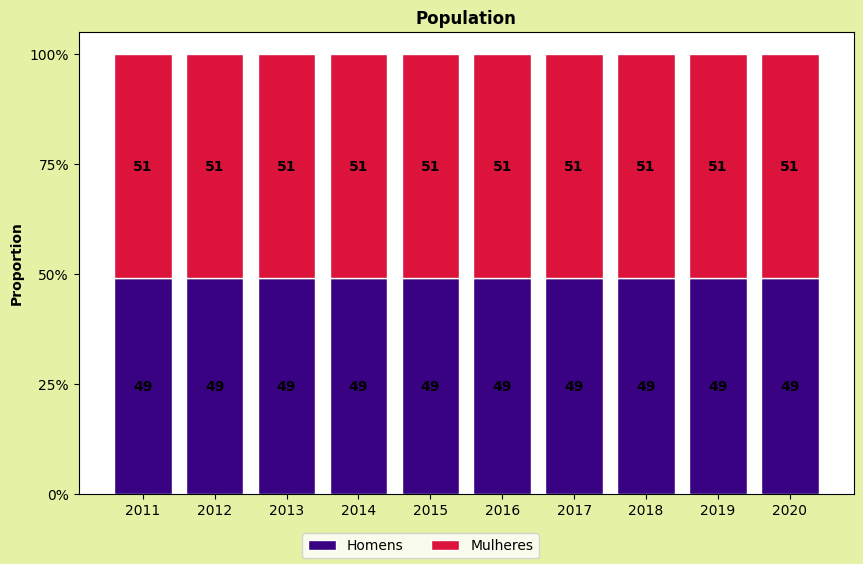

In [58]:
# Característica da População

pop_total = pop_ref_by_sex[pop_ref_by_sex['sex']=='all']['population'].reset_index()

pop_homens = pop_ref_by_sex[pop_ref_by_sex['sex']=='male']['population'].reset_index()
pop_mulheres = pop_ref_by_sex[pop_ref_by_sex['sex']=='female']['population'].reset_index()

r = [0,1,2,3,4,5,6,7,8,9]
g1_bars_bottom = round((pop_homens/pop_total)*100)['population']
g1_bars_top = round((pop_mulheres/pop_total)*100)['population']

fig, ax1 = plt.subplots(1,1,sharex=True,sharey=True,)
p1 = ax1.bar(r, g1_bars_bottom, edgecolor='white', color = '#380282' , label='Homens')
p2 = ax1.bar(r, g1_bars_top, bottom=g1_bars_bottom, edgecolor='white', color = '#DC143C', label='Mulheres')
ax1.set_xticks(r, ["2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"])
ax1.set_yticks([0,25,50,75,100],['0%','25%','50%','75%','100%'])
ax1.set_ylabel('Proportion', fontweight='bold')
ax1.set_title("Population", fontweight='bold')
ax1.bar_label(p1, label_type='center', fontweight='bold')
ax1.bar_label(p2, label_type='center', fontweight='bold')

fig.set_facecolor("#E5F2A5")
handles, labels = ax1.get_legend_handles_labels()
fig.set_figheight(6)
fig.set_figwidth(10)
fig.legend(handles, labels, loc = (0.35, 0.01), ncol=2, labelspacing=0.)
plt.savefig('../images/population_by_sex.jpg')
plt.show()

### Admissões por sexo

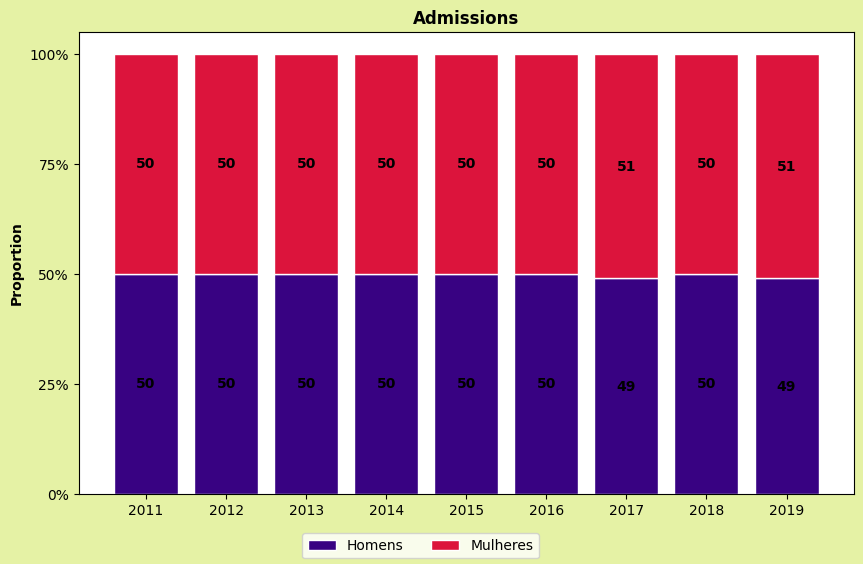

In [59]:
# Característica da População

# Sexo: 1-> masc, 3-> fem

admissoes_total = base.groupby(['ano_inter']).agg({'id':'count'})

admissoes_homens = base[base['sexo'] == 1].groupby(['ano_inter']).agg({'id':'count'}) 
admissoes_mulheres = base[base['sexo'] == 3].groupby(['ano_inter']).agg({'id':'count'})

r = [0,1,2,3,4,5,6,7,8]
g1_bars_bottom = round((admissoes_homens/admissoes_total)*100)['id']
g1_bars_top = round((admissoes_mulheres/admissoes_total)*100)['id']

fig, ax1 = plt.subplots(1,1,sharex=True,sharey=True,)
p1 = ax1.bar(r, g1_bars_bottom, edgecolor='white', color = '#380282' , label='Homens')
p2 = ax1.bar(r, g1_bars_top, bottom=g1_bars_bottom, edgecolor='white', color = '#DC143C', label='Mulheres')
ax1.set_xticks(r, ["2011","2012","2013","2014","2015","2016","2017","2018","2019"])
ax1.set_yticks([0,25,50,75,100],['0%','25%','50%','75%','100%'])
ax1.set_ylabel('Proportion', fontweight='bold')
ax1.set_title("Admissions", fontweight='bold')
ax1.bar_label(p1, label_type='center', fontweight='bold')
ax1.bar_label(p2, label_type='center', fontweight='bold')

fig.set_facecolor("#E5F2A5")
handles, labels = ax1.get_legend_handles_labels()
fig.set_figheight(6)
fig.set_figwidth(10)
fig.legend(handles, labels, loc = (0.35, 0.01), ncol=2, labelspacing=0.)
plt.savefig('../images/admissions_by_sex.jpg')
plt.show()

### Mortes por sexo

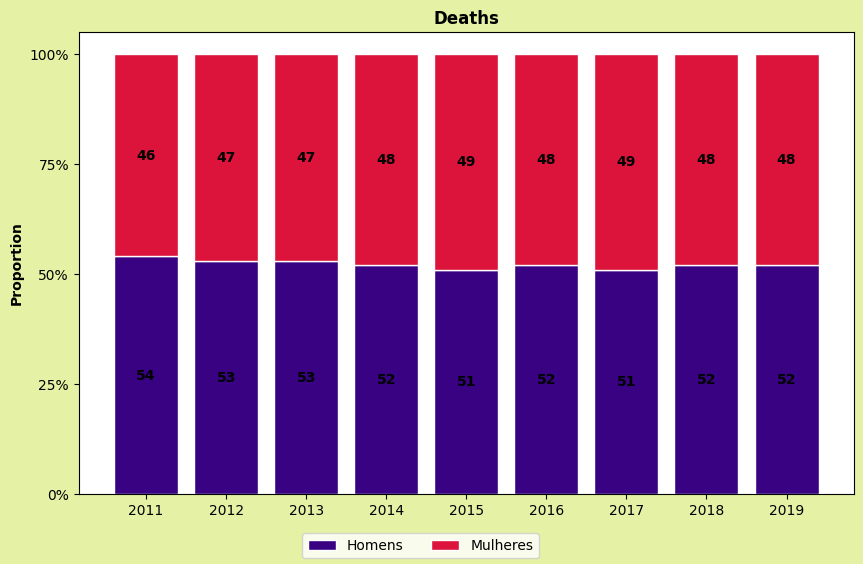

In [60]:
mortes_total = base.groupby(['ano_inter']).agg({'morte':'sum'})

mortes_homens =  base[base['sexo'] == 1].groupby(['ano_inter']).agg({'morte':'sum'})
mortes_mulheres =  base[base['sexo'] == 3].groupby(['ano_inter']).agg({'morte':'sum'})

r = [0,1,2,3,4,5,6,7,8]
g3_bars_bottom = round((mortes_homens/mortes_total)*100)['morte']
g3_bars_top = round((mortes_mulheres/mortes_total)*100)['morte']

fig, ax1 = plt.subplots(1,1,sharex=True,sharey=True,)
p1 = ax1.bar(r, g3_bars_bottom, edgecolor='white', color = '#380282' , label='Homens')
p2 = ax1.bar(r, g3_bars_top, bottom=g3_bars_bottom, edgecolor='white', color = '#DC143C', label='Mulheres')
ax1.set_xticks(r, ["2011","2012","2013","2014","2015","2016","2017","2018","2019"])
ax1.set_yticks([0,25,50,75,100],['0%','25%','50%','75%','100%'])
ax1.set_ylabel('Proportion', fontweight='bold')
ax1.set_title("Deaths", fontweight='bold')
ax1.bar_label(p1, label_type='center', fontweight='bold')
ax1.bar_label(p2, label_type='center', fontweight='bold')

fig.set_facecolor("#E5F2A5")
handles, labels = ax1.get_legend_handles_labels()
fig.set_figheight(6)
fig.set_figwidth(10)
fig.legend(handles, labels, loc = (0.35, 0.01), ncol=2, labelspacing=0.)
plt.savefig('../images/deaths_by_sex.jpg')
plt.show()


### Admissões por raça/cor

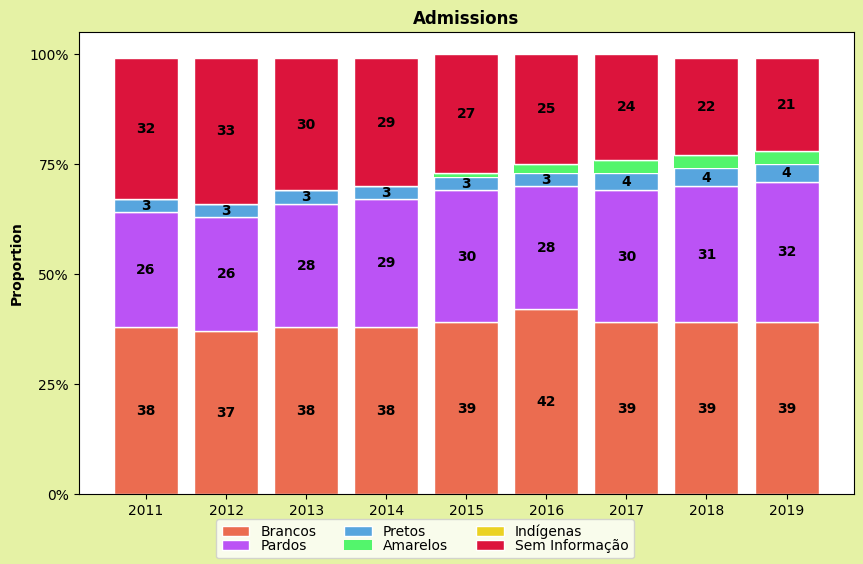

In [61]:
# Raça/Cor: 1 -> branca, 2 -> preta, 3-> parda, 4 -> amarela, 5 -> indigena, 99 -> sem info

admissoes_brancos = base[base['raca_cor'] == 1].groupby(['ano_inter']).agg({'id':'count'})
admissoes_pretos = base[base['raca_cor'] == 2].groupby(['ano_inter']).agg({'id':'count'})
admissoes_pardos = base[base['raca_cor'] == 3].groupby(['ano_inter']).agg({'id':'count'})
admissoes_amarelos = base[base['raca_cor'] == 4].groupby(['ano_inter']).agg({'id':'count'})
admissoes_indigenas = base[base['raca_cor'] == 5].groupby(['ano_inter']).agg({'id':'count'})
admissoes_seminfo = base[base['raca_cor'] == 99].groupby(['ano_inter']).agg({'id':'count'})


r = [0,1,2,3,4,5,6,7,8]
g2_bars_bottom = np.nan_to_num(round((admissoes_brancos/admissoes_total)*100)['id'])
g2_bars_bottom2 = np.nan_to_num(round((admissoes_pardos/admissoes_total)*100)['id'])
g2_bars_bottom3 = np.nan_to_num(round((admissoes_pretos/admissoes_total)*100)['id'])
g2_bars_bottom4 = np.nan_to_num(round((admissoes_amarelos/admissoes_total)*100)['id'])
g2_bars_bottom5 = np.nan_to_num(round((admissoes_indigenas/admissoes_total)*100)['id'])
g2_bars_top = np.nan_to_num(round((admissoes_seminfo/admissoes_total)*100)['id'])


fig, ax2 = plt.subplots(1,1,sharex=True,sharey=True,)
p1 = ax2.bar(r, g2_bars_bottom, edgecolor='white', color = '#EB6C50' , label='Brancos')
p2 = ax2.bar(r, g2_bars_bottom2, bottom=g2_bars_bottom, edgecolor='white', color = '#BB53F5', label='Pardos')
p3 = ax2.bar(r, g2_bars_bottom3, bottom=g2_bars_bottom+g2_bars_bottom2, edgecolor='white', color = '#57A5DE', label='Pretos')
p4 = ax2.bar(r, g2_bars_bottom4, bottom=g2_bars_bottom+g2_bars_bottom2+g2_bars_bottom3, color = '#53F56C', label='Amarelos')
p5 = ax2.bar(r, g2_bars_bottom5, bottom=g2_bars_bottom+g2_bars_bottom2+g2_bars_bottom3+g2_bars_bottom4, edgecolor='white', color = '#EBD222', label='Indígenas')
p6 = ax2.bar(r, g2_bars_top, bottom=g2_bars_bottom+g2_bars_bottom2+g2_bars_bottom3+g2_bars_bottom4+g2_bars_bottom5, edgecolor='white', color = '#DC143C', label='Sem Informação')
ax2.set_xticks(r, ["2011","2012","2013","2014","2015","2016","2017","2018","2019"])
ax2.set_yticks([0,25,50,75,100],['0%','25%','50%','75%','100%'])
ax2.set_ylabel('Proportion', fontweight='bold')
ax2.set_title("Admissions", fontweight='bold')
ax2.bar_label(p1, label_type='center', fontweight='bold')
ax2.bar_label(p2, label_type='center', fontweight='bold')
ax2.bar_label(p3, label_type='center', fontweight='bold')
# ax2.bar_label(p4, label_type='center', fontweight='bold')
# ax2.bar_label(p5, label_type='center', fontweight='bold')
ax2.bar_label(p6, label_type='center', fontweight='bold')
# ax2.set_facecolor("#E5F2A5")
fig.set_facecolor("#E5F2A5")
handles, labels = ax2.get_legend_handles_labels()
fig.set_figheight(6)
fig.set_figwidth(10)
fig.legend(handles, labels, loc = (0.25, 0.01), ncol=3, labelspacing=0.)
plt.savefig('../images/admissions_by_color.jpg')
plt.show()

### Mortes por raça/cor

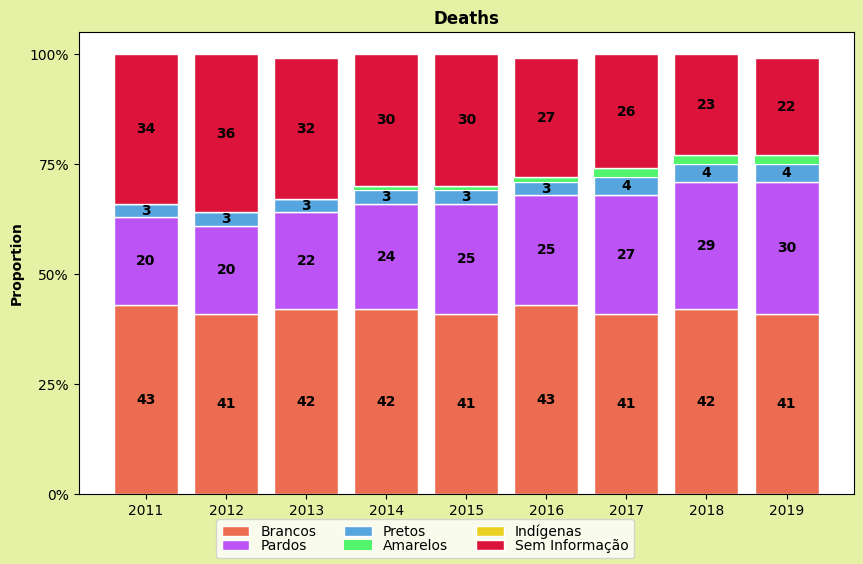

In [62]:
# Raça/Cor: 1 -> branca, 2 -> preta, 3-> parda, 4 -> amarela, 5 -> indigena, 99 -> sem info

mortes_brancos = base[base['raca_cor'] == 1].groupby(['ano_inter']).agg({'morte':'sum'})
mortes_pretos = base[base['raca_cor'] == 2].groupby(['ano_inter']).agg({'morte':'sum'})
mortes_pardos = base[base['raca_cor'] == 3].groupby(['ano_inter']).agg({'morte':'sum'})
mortes_amarelos = base[base['raca_cor'] == 4].groupby(['ano_inter']).agg({'morte':'sum'})
mortes_indigenas = base[base['raca_cor'] == 5].groupby(['ano_inter']).agg({'morte':'sum'})
mortes_seminfo = base[base['raca_cor'] == 99].groupby(['ano_inter']).agg({'morte':'sum'})


r = [0,1,2,3,4,5,6,7,8]
g4_bars_bottom = np.nan_to_num(round((mortes_brancos/mortes_total)*100)['morte'])
g4_bars_bottom2 = np.nan_to_num(round((mortes_pardos/mortes_total)*100)['morte'])
g4_bars_bottom3 = np.nan_to_num(round((mortes_pretos/mortes_total)*100)['morte'])
g4_bars_bottom4 = np.nan_to_num(round((mortes_amarelos/mortes_total)*100)['morte'])
g4_bars_bottom5 = np.nan_to_num(round((mortes_indigenas/mortes_total)*100)['morte'])
g4_bars_top = np.nan_to_num(round((mortes_seminfo/mortes_total)*100)['morte'])


fig, ax2 = plt.subplots(1,1,sharex=True,sharey=True,)
p1 = ax2.bar(r, g4_bars_bottom, edgecolor='white', color = '#EB6C50' , label='Brancos')
p2 = ax2.bar(r, g4_bars_bottom2, bottom=g4_bars_bottom, edgecolor='white', color = '#BB53F5', label='Pardos')
p3 = ax2.bar(r, g4_bars_bottom3, bottom=g4_bars_bottom+g4_bars_bottom2, edgecolor='white', color = '#57A5DE', label='Pretos')
p4 = ax2.bar(r, g4_bars_bottom4, bottom=g4_bars_bottom+g4_bars_bottom2+g4_bars_bottom3, color = '#53F56C', label='Amarelos')
p5 = ax2.bar(r, g4_bars_bottom5, bottom=g4_bars_bottom+g4_bars_bottom2+g4_bars_bottom3+g4_bars_bottom4, edgecolor='white', color = '#EBD222', label='Indígenas')
p6 = ax2.bar(r, g4_bars_top, bottom=g4_bars_bottom+g4_bars_bottom2+g4_bars_bottom3+g4_bars_bottom4+g4_bars_bottom5, edgecolor='white', color = '#DC143C', label='Sem Informação')
ax2.set_xticks(r, ["2011","2012","2013","2014","2015","2016","2017","2018","2019"])
ax2.set_yticks([0,25,50,75,100],['0%','25%','50%','75%','100%'])
ax2.set_ylabel('Proportion', fontweight='bold')
ax2.set_title("Deaths", fontweight='bold')
ax2.bar_label(p1, label_type='center', fontweight='bold')
ax2.bar_label(p2, label_type='center', fontweight='bold')
ax2.bar_label(p3, label_type='center', fontweight='bold')
# ax2.bar_label(p4, label_type='center', fontweight='bold')
# ax2.bar_label(p5, label_type='center', fontweight='bold')
ax2.bar_label(p6, label_type='center', fontweight='bold')
# ax2.set_facecolor("#E5F2A5")
fig.set_facecolor("#E5F2A5")
handles, labels = ax2.get_legend_handles_labels()
fig.set_figheight(6)
fig.set_figwidth(10)
fig.legend(handles, labels, loc = (0.25, 0.01), ncol=3, labelspacing=0.)
plt.savefig('../images/deaths_by_color.jpg')
plt.show()

### Taxa de mortalidade e letalidade

In [63]:
dfmortes = base.groupby(['ano_inter','idade_grupo_who']).agg({'morte':'sum'}).reset_index()
dfmortalidade = age_adjust_ML(dfmortes,dfWHO,pop_ref)
dfmortalidade

,year,population,taxa_ajd_qnt_Y,taxa_ajustada,taxa_ajustada_100mil,taxa_bruta_100mil
0,2011,131850551,29644.0,0.000344,35.0,33.079118
1,2012,134107351,30191.0,0.000344,35.0,33.722984
2,2013,136335739,32206.0,0.000361,37.0,36.084449
3,2014,138561757,31548.0,0.000348,35.0,35.540831
4,2015,140799297,32705.0,0.000355,36.0,37.091805
5,2016,143043728,34253.0,0.000366,37.0,38.865738
6,2017,145303799,33525.0,0.000353,36.0,38.427075
7,2018,147547644,33812.0,0.000350,36.0,38.888456
8,2019,149717521,34193.0,0.000349,35.0,39.632636


In [64]:
dflet = base.groupby(['ano_inter','idade_grupo_who']).agg({'id':'count','morte':'sum'}).reset_index()
dflet.columns = ['ano_inter','idade_grupo_who','admissoes','num']
#df_merged = pd.merge(pop_ref, df,  how='left', left_on=['year','idade_grupo_who'], right_on=['ano_inter','idade_grupo_who']) # junta a quantidade por ano por faixa etária com a população de referencia
dflet['taxa'] = dflet['num']/dflet['admissoes'] # calcula a taxa
dfletalidade = pd.merge(dflet, dfWHO,  how='left', left_on=['idade_grupo_who'], right_on=['age_group']) # junta o dataframe com a proporção do WHO
dfletalidade['obitos_esp'] = dfletalidade['taxa']*dfletalidade['world_avg_dec'] # calcula a proporção da quantidade esperados
dfletalidade = dfletalidade.groupby(['ano_inter']).agg({'num':'sum','obitos_esp':'sum','admissoes':'sum','world_avg_dec':'sum'}).reset_index() # agrupa por ANO
# tx = obts esp / pop
#somar as faixas etarias do ano e dividir pela pop de ref total
dfletalidade['taxa_ajustada'] = dfletalidade['obitos_esp']/dfletalidade['world_avg_dec']
dfletalidade['taxa_ajustada_100mil'] = (dfletalidade['taxa_ajustada']*100000).apply(np.ceil)
dfletalidade['taxa_bruta_100mil'] = (dfletalidade['num']/dfletalidade['admissoes'])*100000
dfletalidade

,ano_inter,num,obitos_esp,admissoes,world_avg_dec,taxa_ajustada,taxa_ajustada_100mil,taxa_bruta_100mil
0,2011,43615,0.043047,362159,0.6538,0.065842,6585.0,12043.052913
1,2012,45225,0.045871,344545,0.6538,0.070160,7017.0,13126.006763
2,2013,49196,0.047786,359744,0.6538,0.073089,7309.0,13675.280199
3,2014,49246,0.048294,344402,0.6538,0.073867,7387.0,14298.987811
4,2015,52225,0.052174,339809,0.6538,0.079801,7981.0,15368.927839
5,2016,55595,0.056603,338561,0.6538,0.086576,8658.0,16420.969929
6,2017,55836,0.053550,351769,0.6538,0.081906,8191.0,15872.916602
7,2018,57379,0.056096,349995,0.6538,0.085799,8580.0,16394.234203
8,2019,59337,0.056632,353591,0.6538,0.086619,8662.0,16781.252917


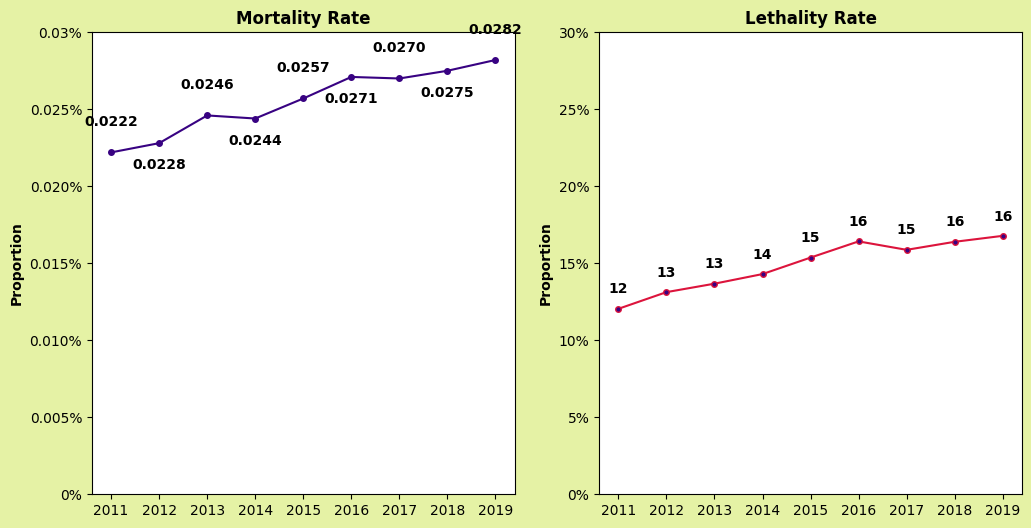

In [65]:
tx_mort = round((mortes_total.reset_index()['morte']/pop_total['population'])*100,4)[0:9]
tx_let = round((mortes_total.reset_index()['morte']/admissoes_total.reset_index()['id'])*100,4)

r = [0,1,2,3,4,5,6,7,8]

fig, (ax1,ax2) = plt.subplots(1,2,sharex=True,)
p1 = ax1.plot(r, tx_mort, marker='o', markerfacecolor='#380282', markersize=4, color = '#380282' , label='Mortality rate')
p2 = ax2.plot(r, tx_let, marker='o', markerfacecolor='#380282', markersize=4, color = '#DC143C' , label='Lethality rate')
ax1.set_xticks(r, ["2011","2012","2013","2014","2015","2016","2017","2018","2019"])
ax1.set_yticks([0,0.005,0.01,0.015,0.02,0.025,0.03],['0%','0.005%','0.010%','0.015%','0.020%','0.025%','0.03%'])
ax1.set_ylabel('Proportion', fontweight='bold')
ax1.set_title("Mortality Rate", fontweight='bold')
a = [1,-1,1,-1,1,-1,1,-1,1,-1]
ax2.set_yticks([0,5,10,15,20,25,30],['0%','5%','10%','15%','20%','25%','30%'])
ax2.set_ylabel('Proportion', fontweight='bold')
ax2.set_title("Lethality Rate", fontweight='bold')

for i in range(len(tx_mort)):
    ax1.text(r[i], tx_mort[i]+(a[i]*0.0017), "%.4f" %tx_mort[i], ha="center", fontweight='bold')
    ax2.text(r[i], tx_let[i]+1, "%d" %tx_let[i], ha="center", fontweight='bold')

fig.set_facecolor("#E5F2A5")

fig.set_figheight(6)
fig.set_figwidth(12)
plt.savefig('../images/mortality_ratio.jpg')
plt.show()



### Valores faltantes na Base

In [66]:
na=(base.shape[0]-base[base.columns].count()).to_frame().reset_index().rename(columns={'index':'COLUNA',0:'NAs'})
na

,COLUNA,NAs
0,id,0
1,estado,0
2,regiao,0
3,munic_res,0
4,sexo,0
...,...,...
61,CO_AMBULATORIAL_SUS,122956
62,cnes_y,3035421
63,qnt_prof,3035421
64,classificacao,0


Text(0.5, 1.0, 'VALORES NULOS')

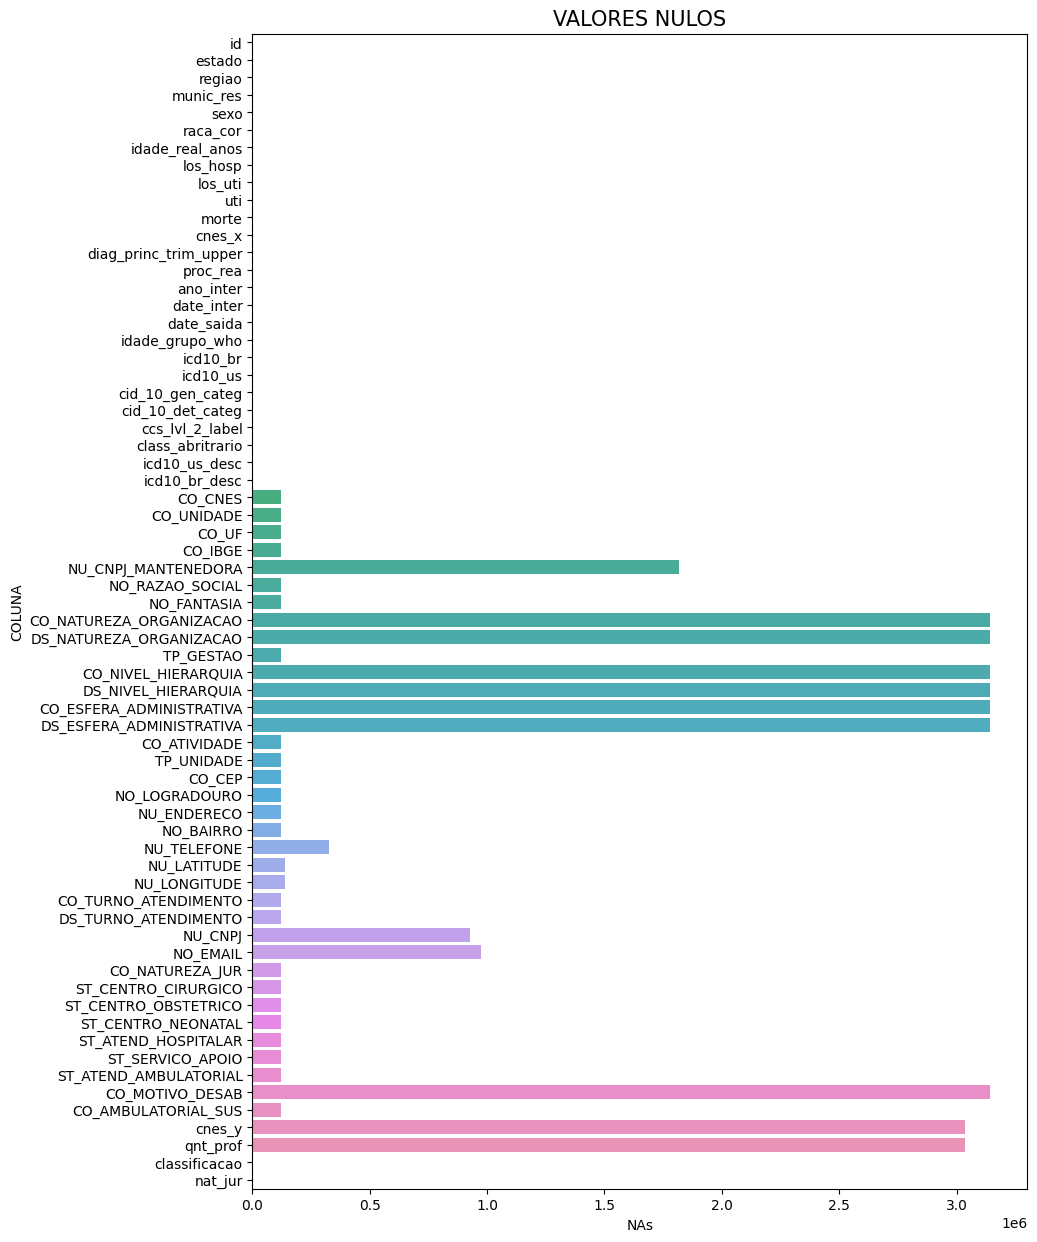

In [67]:
fig, ax = plt.subplots(figsize=(10,15))
sns.barplot(y='COLUNA',x='NAs',data=na,ax=ax).set_title('VALORES NULOS', fontsize=15)
#fig.savefig("imagens2\\nulos.png", dpi=None, facecolor='w', edgecolor='w',
#        orientation='portrait', papertype=None, format=None,
#        transparent=False, bbox_inches=None, pad_inches=0.1,
#        frameon=None, metadata=None)

In [68]:
base.drop(['NU_CNPJ_MANTENEDORA','CO_NATUREZA_ORGANIZACAO','DS_NATUREZA_ORGANIZACAO','DS_NATUREZA_ORGANIZACAO','CO_NIVEL_HIERARQUIA','DS_NIVEL_HIERARQUIA','CO_ESFERA_ADMINISTRATIVA','DS_ESFERA_ADMINISTRATIVA','NU_TELEFONE','NU_LATITUDE','NU_LONGITUDE','NU_CNPJ','NO_EMAIL','CO_MOTIVO_DESAB','cnes_y','qnt_prof'],axis=1,inplace=True)

In [69]:
base.columns

Index(['id', 'estado', 'regiao', 'munic_res', 'sexo', 'raca_cor',
       'idade_real_anos', 'los_hosp', 'los_uti', 'uti', 'morte', 'cnes_x',
       'diag_princ_trim_upper', 'proc_rea', 'ano_inter', 'date_inter',
       'date_saida', 'idade_grupo_who', 'icd10_br', 'icd10_us',
       'cid_10_gen_categ', 'cid_10_det_categ', 'ccs_lvl_2_label',
       'class_abritrario', 'icd10_us_desc', 'icd10_br_desc', 'CO_CNES',
       'CO_UNIDADE', 'CO_UF', 'CO_IBGE', 'NO_RAZAO_SOCIAL', 'NO_FANTASIA',
       'TP_GESTAO', 'CO_ATIVIDADE', 'TP_UNIDADE', 'CO_CEP', 'NO_LOGRADOURO',
       'NU_ENDERECO', 'NO_BAIRRO', 'CO_TURNO_ATENDIMENTO',
       'DS_TURNO_ATENDIMENTO', 'CO_NATUREZA_JUR', 'ST_CENTRO_CIRURGICO',
       'ST_CENTRO_OBSTETRICO', 'ST_CENTRO_NEONATAL', 'ST_ATEND_HOSPITALAR',
       'ST_SERVICO_APOIO', 'ST_ATEND_AMBULATORIAL', 'CO_AMBULATORIAL_SUS',
       'classificacao', 'nat_jur'],
      dtype='object')

### Admissoes por tipo de hospital

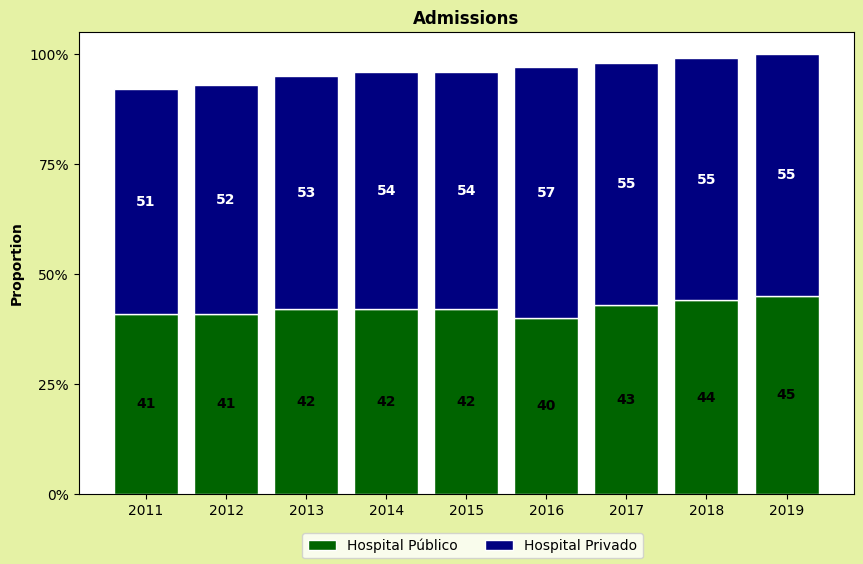

In [70]:
# ADMISSOES POR TIPO DE HOSPITAL

admissoes_total = base.groupby(['ano_inter']).agg({'id':'count'})

admissoes_hosppublico = base[base['nat_jur'] == 'Administração Pública'].groupby(['ano_inter']).agg({'id':'count'}) 
admissoes_hosppart = base[base['nat_jur'] == 'Entidades Empresariais'].groupby(['ano_inter']).agg({'id':'count'})

r = [0,1,2,3,4,5,6,7,8]
g1_bars_bottom = round((admissoes_hosppublico/admissoes_total)*100)['id']
g1_bars_top = round((admissoes_hosppart/admissoes_total)*100)['id']

fig, ax1 = plt.subplots(1,1,sharex=True,sharey=True,)
p1 = ax1.bar(r, g1_bars_bottom, edgecolor='white', color = 'darkgreen' , label='Hospital Público')
p2 = ax1.bar(r, g1_bars_top, bottom=g1_bars_bottom, edgecolor='white', color = 'navy', label='Hospital Privado')
ax1.set_xticks(r, ["2011","2012","2013","2014","2015","2016","2017","2018","2019"])
ax1.set_yticks([0,25,50,75,100],['0%','25%','50%','75%','100%'])
ax1.set_ylabel('Proportion', fontweight='bold')
ax1.set_title("Admissions", fontweight='bold')
ax1.bar_label(p1, label_type='center', fontweight='bold')
ax1.bar_label(p2, label_type='center', fontweight='bold',color='white')

fig.set_facecolor("#E5F2A5")
handles, labels = ax1.get_legend_handles_labels()
fig.set_figheight(6)
fig.set_figwidth(10)
fig.legend(handles, labels, loc = (0.35, 0.01), ncol=2, labelspacing=0.)
plt.savefig('../images/admissions_by_hospital.jpg')
plt.show()

### Mortes por tipo de hospital

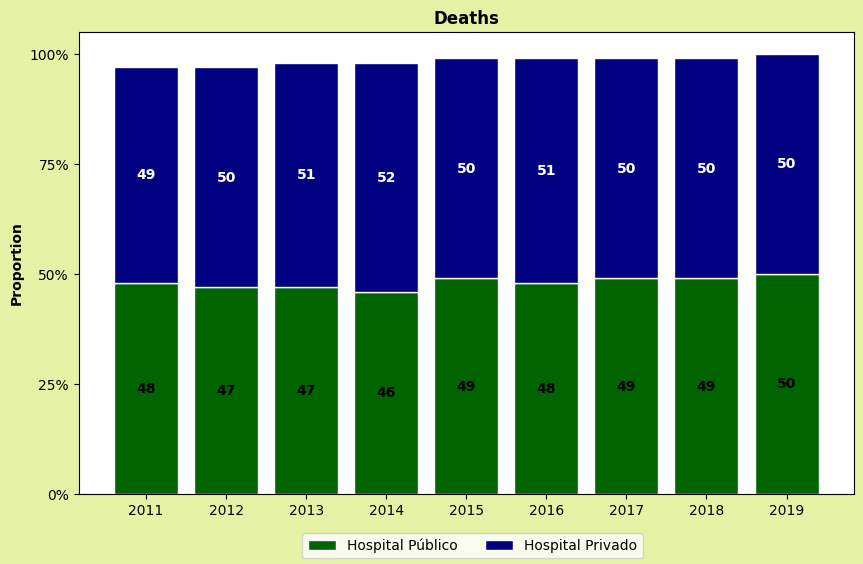

In [71]:
mortes_total = base.groupby(['ano_inter']).agg({'morte':'sum'})

mortes_hosppublico =  base[base['nat_jur'] == 'Administração Pública'].groupby(['ano_inter']).agg({'morte':'sum'})
mortes_hosppart =  base[base['nat_jur'] == 'Entidades Empresariais'].groupby(['ano_inter']).agg({'morte':'sum'})

r = [0,1,2,3,4,5,6,7,8]
g3_bars_bottom = round((mortes_hosppublico/mortes_total)*100)['morte']
g3_bars_top = round((mortes_hosppart/mortes_total)*100)['morte']

fig, ax1 = plt.subplots(1,1,sharex=True,sharey=True,)
p1 = ax1.bar(r, g3_bars_bottom, edgecolor='white', color = 'darkgreen' , label='Hospital Público')
p2 = ax1.bar(r, g3_bars_top, bottom=g3_bars_bottom, edgecolor='white', color = 'navy', label='Hospital Privado')
ax1.set_xticks(r, ["2011","2012","2013","2014","2015","2016","2017","2018","2019"])
ax1.set_yticks([0,25,50,75,100],['0%','25%','50%','75%','100%'])
ax1.set_ylabel('Proportion', fontweight='bold')
ax1.set_title("Deaths", fontweight='bold')
ax1.bar_label(p1, label_type='center', fontweight='bold')
ax1.bar_label(p2, label_type='center', fontweight='bold',color='white')

fig.set_facecolor("#E5F2A5")
handles, labels = ax1.get_legend_handles_labels()
fig.set_figheight(6)
fig.set_figwidth(10)
fig.legend(handles, labels, loc = (0.35, 0.01), ncol=2, labelspacing=0.)
plt.savefig('../images/deaths_by_hospital.jpg')
plt.show()

### Admissoes por Regiao

In [72]:
base['regiao'].unique()

array(['S', 'N', 'NE', 'SE', 'CO'], dtype=object)

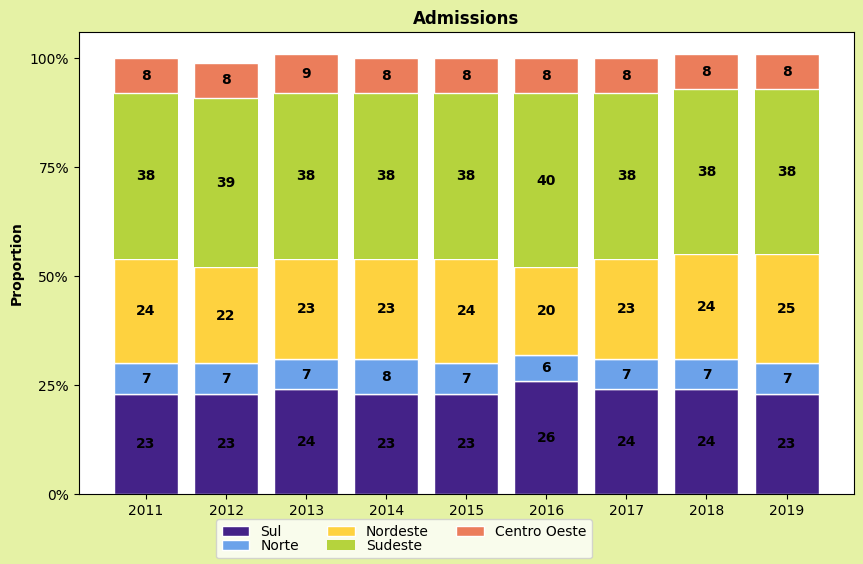

In [73]:
admissoes_S = base[base['regiao'] == 'S'].groupby(['ano_inter']).agg({'id':'count'})
admissoes_N = base[base['regiao'] == 'N'].groupby(['ano_inter']).agg({'id':'count'})
admissoes_NE = base[base['regiao'] == 'NE'].groupby(['ano_inter']).agg({'id':'count'})
admissoes_SE = base[base['regiao'] == 'SE'].groupby(['ano_inter']).agg({'id':'count'})
admissoes_CO = base[base['regiao'] == 'CO'].groupby(['ano_inter']).agg({'id':'count'})


r = [0,1,2,3,4,5,6,7,8]
g2_bars_bottom = np.nan_to_num(round((admissoes_S/admissoes_total)*100)['id'])
g2_bars_bottom2 = np.nan_to_num(round((admissoes_N/admissoes_total)*100)['id'])
g2_bars_bottom3 = np.nan_to_num(round((admissoes_NE/admissoes_total)*100)['id'])
g2_bars_bottom4 = np.nan_to_num(round((admissoes_SE/admissoes_total)*100)['id'])
g2_bars_bottom5 = np.nan_to_num(round((admissoes_CO/admissoes_total)*100)['id'])


fig, ax2 = plt.subplots(1,1,sharex=True,sharey=True,)
p1 = ax2.bar(r, g2_bars_bottom, edgecolor='white', color = '#442288' , label='Sul')
p2 = ax2.bar(r, g2_bars_bottom2, bottom=g2_bars_bottom, edgecolor='white', color = '#6CA2EA', label='Norte')
p3 = ax2.bar(r, g2_bars_bottom3, bottom=g2_bars_bottom+g2_bars_bottom2, edgecolor='white', color = '#FED23F', label='Nordeste')
p4 = ax2.bar(r, g2_bars_bottom4, bottom=g2_bars_bottom+g2_bars_bottom2+g2_bars_bottom3, color = '#B5D33D', label='Sudeste')
p5 = ax2.bar(r, g2_bars_bottom5, bottom=g2_bars_bottom+g2_bars_bottom2+g2_bars_bottom3+g2_bars_bottom4, edgecolor='white', color = '#EB7D5B', label='Centro Oeste')
ax2.set_xticks(r, ["2011","2012","2013","2014","2015","2016","2017","2018","2019"])
ax2.set_yticks([0,25,50,75,100],['0%','25%','50%','75%','100%'])
ax2.set_ylabel('Proportion', fontweight='bold')
ax2.set_title("Admissions", fontweight='bold')
ax2.bar_label(p1, label_type='center', fontweight='bold')
ax2.bar_label(p2, label_type='center', fontweight='bold')
ax2.bar_label(p3, label_type='center', fontweight='bold')
ax2.bar_label(p4, label_type='center', fontweight='bold')
ax2.bar_label(p5, label_type='center', fontweight='bold')
# ax2.set_facecolor("#E5F2A5")
fig.set_facecolor("#E5F2A5")
handles, labels = ax2.get_legend_handles_labels()
fig.set_figheight(6)
fig.set_figwidth(10)
fig.legend(handles, labels, loc = (0.25, 0.01), ncol=3, labelspacing=0.)
plt.savefig('../images/admissions_by_REGION.jpg')
plt.show()

### Mortes por Regiao

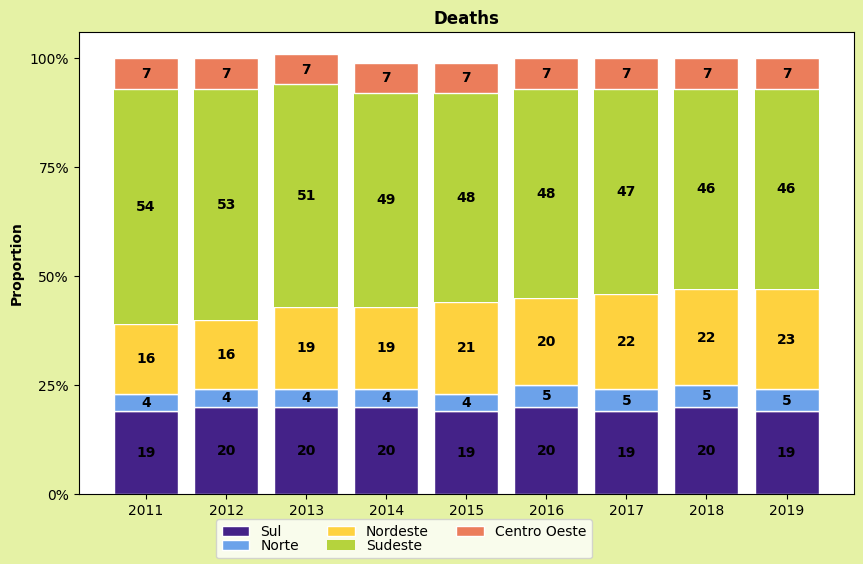

In [74]:
# Raça/Cor: 1 -> branca, 2 -> preta, 3-> parda, 4 -> amarela, 5 -> indigena, 99 -> sem info

mortes_S = base[base['regiao'] == 'S'].groupby(['ano_inter']).agg({'morte':'sum'})
mortes_N = base[base['regiao'] == 'N'].groupby(['ano_inter']).agg({'morte':'sum'})
mortes_NE = base[base['regiao'] == 'NE'].groupby(['ano_inter']).agg({'morte':'sum'})
mortes_SE = base[base['regiao'] == 'SE'].groupby(['ano_inter']).agg({'morte':'sum'})
mortes_CO = base[base['regiao'] == 'CO'].groupby(['ano_inter']).agg({'morte':'sum'})


r = [0,1,2,3,4,5,6,7,8]
g4_bars_bottom = np.nan_to_num(round((mortes_S/mortes_total)*100)['morte'])
g4_bars_bottom2 = np.nan_to_num(round((mortes_N/mortes_total)*100)['morte'])
g4_bars_bottom3 = np.nan_to_num(round((mortes_NE/mortes_total)*100)['morte'])
g4_bars_bottom4 = np.nan_to_num(round((mortes_SE/mortes_total)*100)['morte'])
g4_bars_bottom5 = np.nan_to_num(round((mortes_CO/mortes_total)*100)['morte'])


fig, ax2 = plt.subplots(1,1,sharex=True,sharey=True,)
p1 = ax2.bar(r, g4_bars_bottom, edgecolor='white', color = '#442288' , label='Sul')
p2 = ax2.bar(r, g4_bars_bottom2, bottom=g4_bars_bottom, edgecolor='white', color = '#6CA2EA', label='Norte')
p3 = ax2.bar(r, g4_bars_bottom3, bottom=g4_bars_bottom+g4_bars_bottom2, edgecolor='white', color = '#FED23F', label='Nordeste')
p4 = ax2.bar(r, g4_bars_bottom4, bottom=g4_bars_bottom+g4_bars_bottom2+g4_bars_bottom3, color = '#B5D33D', label='Sudeste')
p5 = ax2.bar(r, g4_bars_bottom5, bottom=g4_bars_bottom+g4_bars_bottom2+g4_bars_bottom3+g4_bars_bottom4, edgecolor='white', color = '#EB7D5B', label='Centro Oeste')
ax2.set_xticks(r, ["2011","2012","2013","2014","2015","2016","2017","2018","2019"])
ax2.set_yticks([0,25,50,75,100],['0%','25%','50%','75%','100%'])
ax2.set_ylabel('Proportion', fontweight='bold')
ax2.set_title("Deaths", fontweight='bold')
ax2.bar_label(p1, label_type='center', fontweight='bold')
ax2.bar_label(p2, label_type='center', fontweight='bold')
ax2.bar_label(p3, label_type='center', fontweight='bold')
ax2.bar_label(p4, label_type='center', fontweight='bold')
ax2.bar_label(p5, label_type='center', fontweight='bold')
# ax2.set_facecolor("#E5F2A5")
fig.set_facecolor("#E5F2A5")
handles, labels = ax2.get_legend_handles_labels()
fig.set_figheight(6)
fig.set_figwidth(10)
fig.legend(handles, labels, loc = (0.25, 0.01), ncol=3, labelspacing=0.)
plt.savefig('../images/deaths_by_region.jpg')
plt.show()

### LOS de pacientes em Uti por sexo

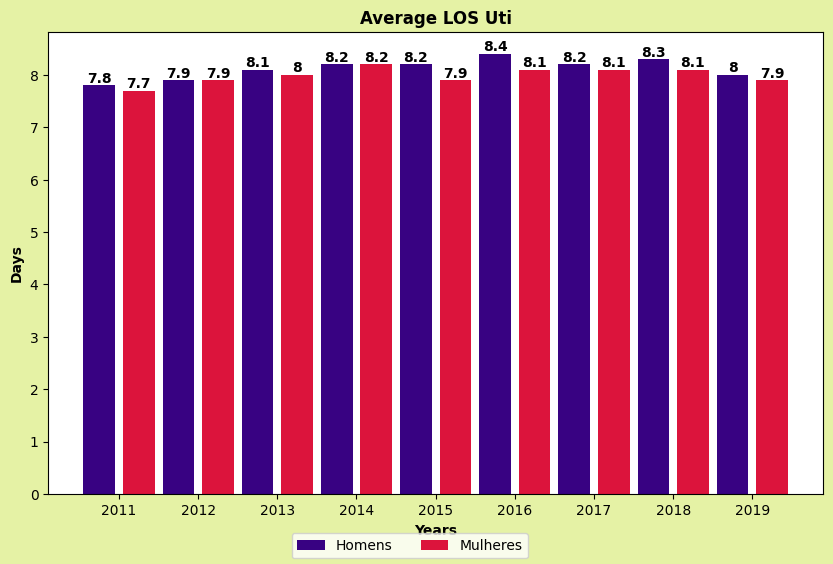

In [75]:
losuti_total = base[base['uti']==1].groupby(['ano_inter','sexo']).agg({'los_uti':'mean'}).reset_index()
losuti_total['Sexo'] = losuti_total['sexo'].apply(lambda x: 'Homem' if x == 1 else "Mulher")


losuti_homens =  base[(base['sexo'] == 1)&(base['uti']==1)].groupby(['ano_inter']).agg({'los_uti':'mean'}).reset_index()
losuti_mulheres =  base[(base['sexo'] == 3)&(base['uti']==1)].groupby(['ano_inter']).agg({'los_uti':'mean'}).reset_index()

r = [0,1,2,3,4,5,6,7,8]
r2 = [0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5]
#g3_bars_bottom = round((losuti_homens/losuti_total)*100)['los_uti']
#g3_bars_top = round((losuti_mulheres/losuti_total)*100)['los_uti']

fig, ax1 = plt.subplots(1,1,sharex=True,sharey=True,)
#p1 = ax1.bar(r, g3_bars_bottom, edgecolor='white', color = '#380282' , label='Homens')
#p2 = ax1.bar(r, g3_bars_top, bottom=g3_bars_bottom, edgecolor='white', color = '#DC143C', label='Mulheres')

p1 = ax1.bar(r, round(losuti_homens['los_uti'],1), color = '#380282', width = 0.4, label='Homens')
p2 = ax1.bar(r2, round(losuti_mulheres['los_uti'],1), color = '#DC143C',width = 0.4, label='Mulheres')
#ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)

#p1 = sns.barplot(data=losuti_total, x='ano_inter',y='los_uti',hue='Sexo')

#p2 = sns.barplot(data=losuti_mulheres, x='ano_inter',y='los_uti',color = '#DC143C' , label='Homens')

ax1.set_xticks([0.25,1.25,2.25,3.25,4.25,5.25,6.25,7.25,8.25], ["2011","2012","2013","2014","2015","2016","2017","2018","2019"])
#ax1.set_yticks([0,25,50,75,100],['0%','25%','50%','75%','100%'])
ax1.set_ylabel('Days', fontweight='bold')
ax1.set_xlabel('Years', fontweight='bold')

ax1.set_title("Average LOS Uti", fontweight='bold')
ax1.bar_label(p1, label_type='edge', fontweight='bold')
ax1.bar_label(p2, label_type='edge', fontweight='bold')

fig.set_facecolor("#E5F2A5")
handles, labels = ax1.get_legend_handles_labels()
fig.set_figheight(6)
fig.set_figwidth(10)
fig.legend(handles, labels, loc = (0.35, 0.01), ncol=2, labelspacing=0.)
plt.savefig('../images/los_by_sex.jpg')
plt.show()

### LOS UTI por tipo de hospital

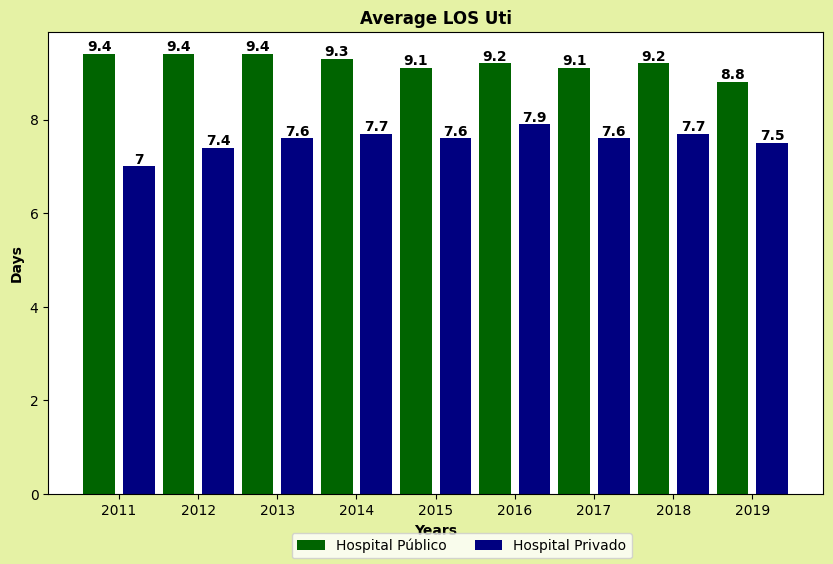

In [76]:
#losuti_total = base[base['uti']==1].groupby(['ano_inter','sexo']).agg({'los_uti':'mean'}).reset_index()
#losuti_total['Sexo'] = losuti_total['sexo'].apply(lambda x: 'Homem' if x == 1 else "Mulher")

#mortes_hosppublico =  base[base['nat_jur'] == 'Administração Pública'].groupby(['ano_inter']).agg({'morte':'sum'})
#mortes_hosppart =  base[base['nat_jur'] == ].groupby(['ano_inter']).agg({'morte':'sum'})

losuti_publico =  base[(base['nat_jur'] == 'Administração Pública')&(base['uti']==1)].groupby(['ano_inter']).agg({'los_uti':'mean'}).reset_index()
losuti_priv =  base[(base['nat_jur'] == 'Entidades Empresariais')&(base['uti']==1)].groupby(['ano_inter']).agg({'los_uti':'mean'}).reset_index()

r = [0,1,2,3,4,5,6,7,8]
r2 = [0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5]
#g3_bars_bottom = round((losuti_homens/losuti_total)*100)['los_uti']
#g3_bars_top = round((losuti_mulheres/losuti_total)*100)['los_uti']

fig, ax1 = plt.subplots(1,1,sharex=True,sharey=True,)
#p1 = ax1.bar(r, g3_bars_bottom, edgecolor='white', color = '#380282' , label='Homens')
#p2 = ax1.bar(r, g3_bars_top, bottom=g3_bars_bottom, edgecolor='white', color = '#DC143C', label='Mulheres')

p1 = ax1.bar(r, round(losuti_publico['los_uti'],1), color = 'darkgreen', width = 0.4, label='Hospital Público')
p2 = ax1.bar(r2, round(losuti_priv['los_uti'],1), color = 'navy',width = 0.4, label='Hospital Privado')
#ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)

#p1 = sns.barplot(data=losuti_total, x='ano_inter',y='los_uti',hue='Sexo')

#p2 = sns.barplot(data=losuti_mulheres, x='ano_inter',y='los_uti',color = '#DC143C' , label='Homens')

ax1.set_xticks([0.25,1.25,2.25,3.25,4.25,5.25,6.25,7.25,8.25], ["2011","2012","2013","2014","2015","2016","2017","2018","2019"])
#ax1.set_yticks([0,25,50,75,100],['0%','25%','50%','75%','100%'])
ax1.set_ylabel('Days', fontweight='bold')
ax1.set_xlabel('Years', fontweight='bold')

ax1.set_title("Average LOS Uti", fontweight='bold')
ax1.bar_label(p1, label_type='edge', fontweight='bold')
ax1.bar_label(p2, label_type='edge', fontweight='bold')

fig.set_facecolor("#E5F2A5")
handles, labels = ax1.get_legend_handles_labels()
fig.set_figheight(6)
fig.set_figwidth(10)
fig.legend(handles, labels, loc = (0.35, 0.01), ncol=2, labelspacing=0.)
plt.savefig('../images/los_by_hospital.jpg')
plt.show()

### LOS por Região

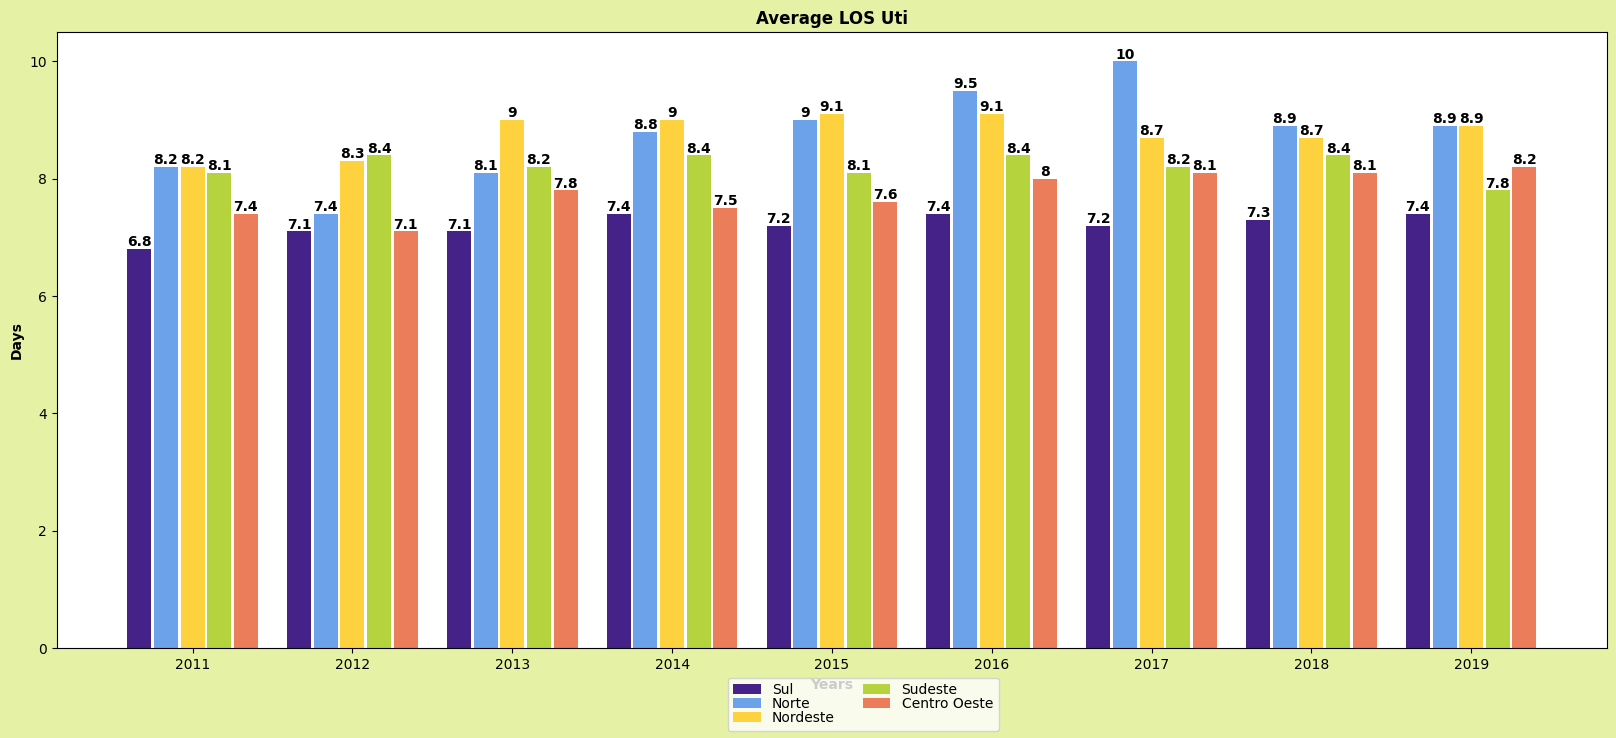

In [77]:
#losuti_total = base[base['uti']==1].groupby(['ano_inter','sexo']).agg({'los_uti':'mean'}).reset_index()
#losuti_total['Sexo'] = losuti_total['sexo'].apply(lambda x: 'Homem' if x == 1 else "Mulher")

#mortes_hosppublico =  base[base['nat_jur'] == 'Administração Pública'].groupby(['ano_inter']).agg({'morte':'sum'})
#mortes_hosppart =  base[base['nat_jur'] == ].groupby(['ano_inter']).agg({'morte':'sum'})

losuti_S =  base[(base['regiao'] == 'S')&(base['uti']==1)].groupby(['ano_inter']).agg({'los_uti':'mean'}).reset_index()
losuti_N =  base[(base['regiao'] == 'N')&(base['uti']==1)].groupby(['ano_inter']).agg({'los_uti':'mean'}).reset_index()
losuti_NE =  base[(base['regiao'] == 'NE')&(base['uti']==1)].groupby(['ano_inter']).agg({'los_uti':'mean'}).reset_index()
losuti_SE =  base[(base['regiao'] == 'SE')&(base['uti']==1)].groupby(['ano_inter']).agg({'los_uti':'mean'}).reset_index()
losuti_CO =  base[(base['regiao'] == 'CO')&(base['uti']==1)].groupby(['ano_inter']).agg({'los_uti':'mean'}).reset_index()

r = [0,6,12,18,24,30,36,42,48]
r2 = np.array(r) + 1
r3 = np.array(r2) + 1
r4 = np.array(r3) + 1
r5 = np.array(r4) + 1
#r2 = [0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5]
#g3_bars_bottom = round((losuti_homens/losuti_total)*100)['los_uti']
#g3_bars_top = round((losuti_mulheres/losuti_total)*100)['los_uti']

fig, ax = plt.subplots(1,1,sharex=True,sharey=True,)
#p1 = ax1.bar(r, g3_bars_bottom, edgecolor='white', color = '#380282' , label='Homens')
#p2 = ax1.bar(r, g3_bars_top, bottom=g3_bars_bottom, edgecolor='white', color = '#DC143C', label='Mulheres')

p1 = ax.bar(r, round(losuti_S['los_uti'],1), color = '#442288', width = 0.9, label='Sul')
p2 = ax.bar(r2, round(losuti_N['los_uti'],1), color = '#6CA2EA',width = 0.9, label='Norte')
p3 = ax.bar(r3, round(losuti_NE['los_uti'],1), color = '#FED23F',width = 0.9, label='Nordeste')
p4 = ax.bar(r4, round(losuti_SE['los_uti'],1), color = '#B5D33D',width = 0.9, label='Sudeste')
p5 = ax.bar(r5, round(losuti_CO['los_uti'],1), color = '#EB7D5B',width = 0.9, label='Centro Oeste')

ax.set_xticks(r3, ["2011","2012","2013","2014","2015","2016","2017","2018","2019"])
#ax1.set_yticks([0,25,50,75,100],['0%','25%','50%','75%','100%'])
ax.set_ylabel('Days', fontweight='bold')
ax.set_xlabel('Years', fontweight='bold')
ax.set_title("Average LOS Uti", fontweight='bold')
ax.bar_label(p1, label_type='edge', fontweight='bold')
ax.bar_label(p2, label_type='edge', fontweight='bold')
ax.bar_label(p3, label_type='edge', fontweight='bold')
ax.bar_label(p4, label_type='edge', fontweight='bold')
ax.bar_label(p5, label_type='edge', fontweight='bold')

fig.set_facecolor("#E5F2A5")
handles, labels = ax.get_legend_handles_labels()
fig.set_figheight(8)
fig.set_figwidth(20)
fig.legend(handles, labels, loc = (0.45, 0.01), ncol=2, labelspacing=0.)
plt.savefig('../images/los_by_region.jpg')
plt.show()

# Análise da Base SIM

In [78]:
base.head()

,id,estado,regiao,munic_res,sexo,raca_cor,idade_real_anos,los_hosp,los_uti,uti,morte,cnes_x,diag_princ_trim_upper,proc_rea,ano_inter,date_inter,date_saida,idade_grupo_who,icd10_br,icd10_us,cid_10_gen_categ,cid_10_det_categ,ccs_lvl_2_label,class_abritrario,icd10_us_desc,icd10_br_desc,CO_CNES,CO_UNIDADE,CO_UF,CO_IBGE,NO_RAZAO_SOCIAL,NO_FANTASIA,TP_GESTAO,CO_ATIVIDADE,TP_UNIDADE,CO_CEP,NO_LOGRADOURO,NU_ENDERECO,NO_BAIRRO,CO_TURNO_ATENDIMENTO,DS_TURNO_ATENDIMENTO,CO_NATUREZA_JUR,ST_CENTRO_CIRURGICO,ST_CENTRO_OBSTETRICO,ST_CENTRO_NEONATAL,ST_ATEND_HOSPITALAR,ST_SERVICO_APOIO,ST_ATEND_AMBULATORIAL,CO_AMBULATORIAL_SUS,classificacao,nat_jur
0,96789447,SC,S,421570,3,1,87,15,0,0,0,2418177,J181,303140151,2011,2011-06-15,2011-06-30,85+,J181,J181,RESPIRATORY SYSTEM,Pneumonia (except that caused by tuberculosis ...,Respiratory infections,Infeccions,"Lobar pneumonia, unspecified organism",Pneumonia lobar NE,2418177.0,4.215702e+12,42.0,421570.0,SOCIEDADE HOSPITALAR SAO FRANCISCO DE ASSIS,HOSPITAL SAO FRANCISCO,M,4.0,5.0,88140000.0,ESCRIVAO ALFREDO PORTO,99,CENTRO,6.0,ATENDIMENTO CONTINUO DE 24 HORAS/DIA (PLANTAO:...,3999.0,1.0,0.0,0.0,1.0,1.0,1.0,SIM,1,Entidades Empresariais
1,96791595,SC,S,420240,1,1,84,4,0,0,1,2558246,J189,303140151,2011,2011-06-11,2011-06-15,80-84,J189,J189,RESPIRATORY SYSTEM,Pneumonia (except that caused by tuberculosis ...,Respiratory infections,Infeccions,"Pneumonia, unspecified organism",Pneumonia NE,2558246.0,4.202403e+12,42.0,420240.0,ASSOCIACAO CONGREGACAO DESANTA CATARINA,HOSPITAL SANTA ISABEL,M,3.0,5.0,89010506.0,RUA FLORIANO PEIXOTO,300,CENTRO,6.0,ATENDIMENTO CONTINUO DE 24 HORAS/DIA (PLANTAO:...,3999.0,1.0,1.0,1.0,1.0,1.0,1.0,SIM,1,Entidades Empresariais
2,96789449,SC,S,421570,3,1,92,5,0,0,0,2418177,J180,303140151,2011,2011-07-09,2011-07-14,85+,J180,J180,RESPIRATORY SYSTEM,Pneumonia (except that caused by tuberculosis ...,Respiratory infections,Infeccions,"Bronchopneumonia, unspecified organism",Broncopneumonia NE,2418177.0,4.215702e+12,42.0,421570.0,SOCIEDADE HOSPITALAR SAO FRANCISCO DE ASSIS,HOSPITAL SAO FRANCISCO,M,4.0,5.0,88140000.0,ESCRIVAO ALFREDO PORTO,99,CENTRO,6.0,ATENDIMENTO CONTINUO DE 24 HORAS/DIA (PLANTAO:...,3999.0,1.0,0.0,0.0,1.0,1.0,1.0,SIM,1,Entidades Empresariais
3,96791075,SC,S,420200,1,1,25,4,0,0,0,2772752,J180,303140151,2011,2011-05-22,2011-05-26,25-29,J180,J180,RESPIRATORY SYSTEM,Pneumonia (except that caused by tuberculosis ...,Respiratory infections,Infeccions,"Bronchopneumonia, unspecified organism",Broncopneumonia NE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Organizações Internacionais e Outras Instituiç...
4,96789560,SC,S,420650,3,1,67,9,0,0,0,2492342,J189,303140151,2011,2011-05-27,2011-06-05,65-69,J189,J189,RESPIRATORY SYSTEM,Pneumonia (except that caused by tuberculosis ...,Respiratory infections,Infeccions,"Pneumonia, unspecified organism",Pneumonia NE,2492342.0,4.206502e+12,42.0,420650.0,INSTITUTO SANTE,HOSPITAL SANTO ANTONIO GUARAMIRIM,M,4.0,5.0,89270000.0,JOAO BUTSCHARDT,05,CENTRO,6.0,ATENDIMENTO CONTINUO DE 24 HORAS/DIA (PLANTAO:...,3999.0,1.0,0.0,0.0,1.0,1.0,1.0,SIM,1,Entidades Empresariais


In [79]:
base.columns

Index(['id', 'estado', 'regiao', 'munic_res', 'sexo', 'raca_cor',
       'idade_real_anos', 'los_hosp', 'los_uti', 'uti', 'morte', 'cnes_x',
       'diag_princ_trim_upper', 'proc_rea', 'ano_inter', 'date_inter',
       'date_saida', 'idade_grupo_who', 'icd10_br', 'icd10_us',
       'cid_10_gen_categ', 'cid_10_det_categ', 'ccs_lvl_2_label',
       'class_abritrario', 'icd10_us_desc', 'icd10_br_desc', 'CO_CNES',
       'CO_UNIDADE', 'CO_UF', 'CO_IBGE', 'NO_RAZAO_SOCIAL', 'NO_FANTASIA',
       'TP_GESTAO', 'CO_ATIVIDADE', 'TP_UNIDADE', 'CO_CEP', 'NO_LOGRADOURO',
       'NU_ENDERECO', 'NO_BAIRRO', 'CO_TURNO_ATENDIMENTO',
       'DS_TURNO_ATENDIMENTO', 'CO_NATUREZA_JUR', 'ST_CENTRO_CIRURGICO',
       'ST_CENTRO_OBSTETRICO', 'ST_CENTRO_NEONATAL', 'ST_ATEND_HOSPITALAR',
       'ST_SERVICO_APOIO', 'ST_ATEND_AMBULATORIAL', 'CO_AMBULATORIAL_SUS',
       'classificacao', 'nat_jur'],
      dtype='object')

In [80]:
base_mortalidade = base[['estado','regiao','sexo','raca_cor','idade_real_anos','los_hosp','los_uti','uti','diag_princ_trim_upper','nat_jur','morte']]

In [81]:
base_losuti = base[base['uti']==1][['estado','regiao','sexo','raca_cor','idade_real_anos','diag_princ_trim_upper','nat_jur','los_uti']]

In [82]:
base_mortalidade.to_csv('../data/base_mortalidade.csv')
base_losuti.to_csv('../data/base_losuti.csv')

In [83]:
sim2020 = pd.read_csv('../data/Mortalidade_Geral_2020.csv',sep=';')

FileNotFoundError: [Errno 2] No such file or directory: '../data/Mortalidade_Geral_2020.csv'

In [ ]:
sim2020

In [ ]:
sim2020.columns